In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

pd.set_option('display.max_columns', None)

# **Dataset**

In [ ]:
df = pd.read_csv('okcupid_profiles.csv')
df.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  height  income                          job  \
0         asian, white    75.0      -1               transportation   
1                white    70.0   80000         hospitality / travel   
2                  NaN    68.0      -1                          NaN   
3                white    71.0   20000                      student   
4  asian, black, other    66.0      -1  artistic / musical / writer   

        last_online                         location  \
0  2012-06-28-20-30  south san francisco, california   
1  2012-06-29-21-41              oakland, california   
2  2012-06-27-09-10        san francisco, california   
3  2012-06-28-14-22             berkeley, california   
4  2012-06-27-21-26        san francisco, california   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                                     NaN                   has cats   
3                       doesn't want kids                 likes cats   
4                                     NaN  likes dogs and likes cats   

                                   religion  \
0     agnosticism and very serious about it   
1  agnosticism but not too serious about it   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks  \
0                                            english   
1  english (fluently), spanish (poorly), french (...   
2                               english, french, c++   
3                           english, german (poorly)   
4                                            english   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the

In [ ]:
df.shape

(59946, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

## Metadata

| No | Column Name    | Non-Null Count | Dtype   | Description                                  |
|----|----------------|----------------|---------|----------------------------------------------|
| 0  | age            | 59,946         | int64   | Usia pengguna                                |
| 1  | status         | 59,946         | object  | Status hubungan (single, married, dll)       |
| 2  | sex            | 59,946         | object  | Jenis kelamin                                |
| 3  | orientation    | 59,946         | object  | Orientasi seksual                            |
| 4  | body_type      | 54,650         | object  | Tipe tubuh                                   |
| 5  | diet           | 35,551         | object  | Pola makan                                   |
| 6  | drinks         | 56,961         | object  | Kebiasaan minum alkohol                      |
| 7  | drugs          | 45,866         | object  | Penggunaan obat-obatan                       |
| 8  | education      | 53,318         | object  | Tingkat pendidikan                           |
| 9  | ethnicity      | 54,266         | object  | Latar belakang etnis                         |
| 10 | height         | 59,943         | float64 | Tinggi badan (dalam inci)                    |
| 11 | income         | 59,946         | int64   | Penghasilan tahunan (dalam USD)              |
| 12 | job            | 51,748         | object  | Pekerjaan                                    |
| 13 | last_online    | 59,946         | object  | Waktu terakhir aktif di aplikasi             |
| 14 | location       | 59,946         | object  | Lokasi geografis                             |
| 15 | offspring      | 24,385         | object  | Jumlah anak/persepsi tentang punya anak      |
| 16 | pets           | 40,025         | object  | Kepemilikan hewan peliharaan                 |
| 17 | religion       | 39,720         | object  | Keyakinan agama                              |
| 18 | sign           | 48,890         | object  | Zodiak                                       |
| 19 | smokes         | 54,434         | object  | Kebiasaan merokok                            |
| 20 | speaks         | 59,896         | object  | Bahasa yang dikuasai                         |
| 21 | essay0         | 54,458         | object  | Esai pengguna: Tentang diri saya             |
| 22 | essay1         | 52,374         | object  | Esai pengguna: Kegiatan sehari-hari          |
| 23 | essay2         | 50,308         | object  | Esai pengguna: Hal yang dibanggakan          |
| 24 | essay3         | 48,470         | object  | Esai pengguna: Pertama kali dilihat orang    |
| 25 | essay4         | 49,409         | object  | Esai pengguna: Pikiran saat bangun tidur     |
| 26 | essay5         | 49,096         | object  | Esai pengguna: Topik obrolan                 |
| 27 | essay6         | 46,175         | object  | Esai pengguna: Hiburan waktu luang           |
| 28 | essay7         | 47,495         | object  | Esai pengguna: Foto favorit                  |
| 29 | essay8         | 40,721         | object  | Esai pengguna: Kehidupan privasi             |
| 30 | essay9         | 47,343         | object  | Esai pengguna: Pesan untuk kencan pertama    |

# **Data Visualization**

## Categorical

In [ ]:
df['ethnicity'].unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

### Status

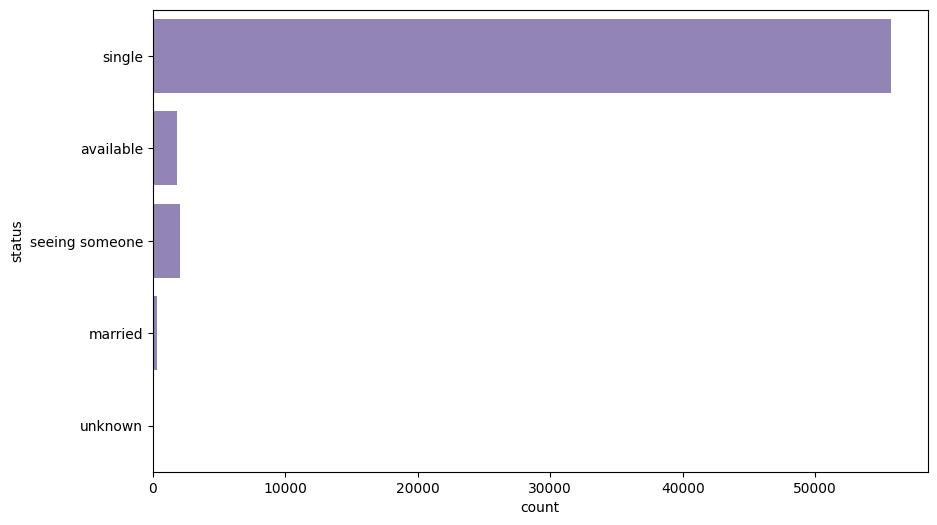

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='status', color='#8E7DBE')
plt.show()

### Sex

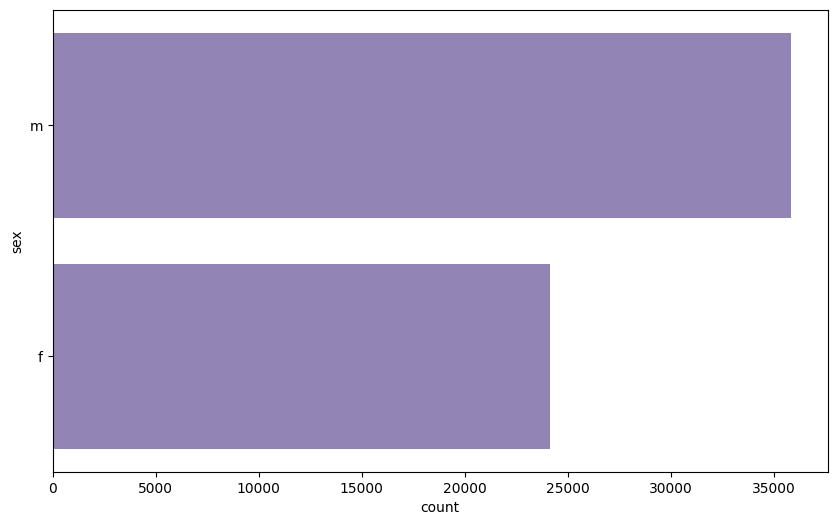

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='sex', color='#8E7DBE')
plt.show()

### Orientation

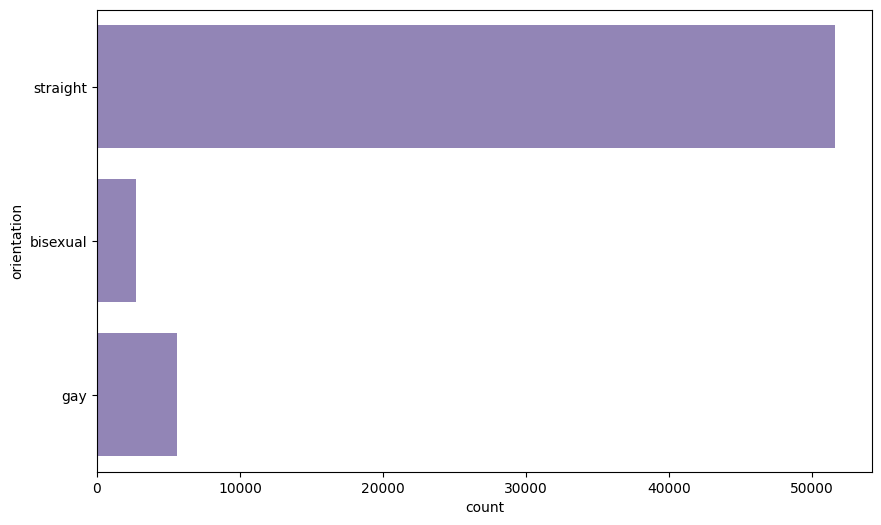

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='orientation', color='#8E7DBE')
plt.show()

### Body type

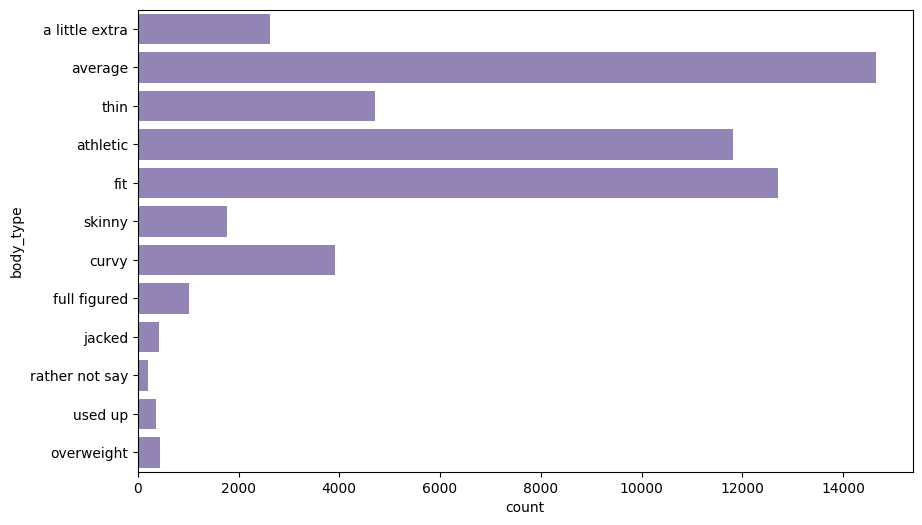

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='body_type', color='#8E7DBE')
plt.show()

### Diet

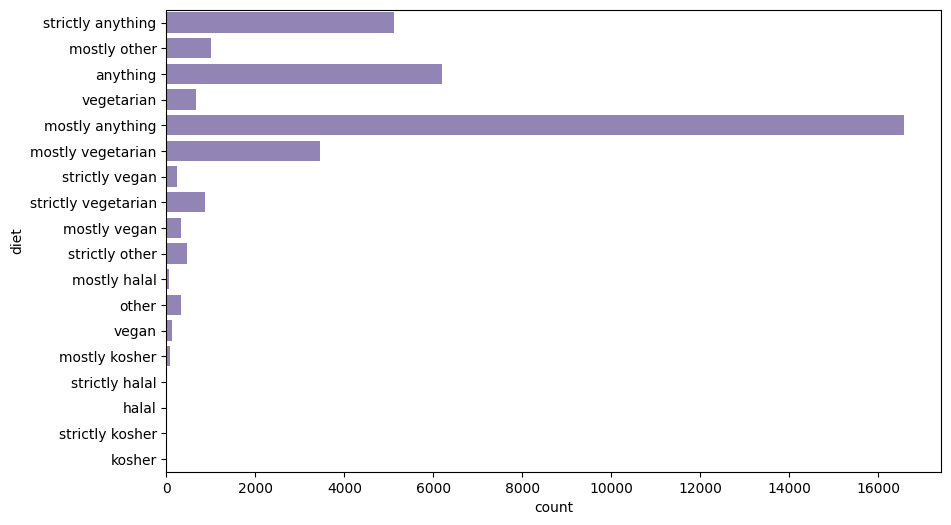

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='diet', color='#8E7DBE')
plt.show()

### Drink

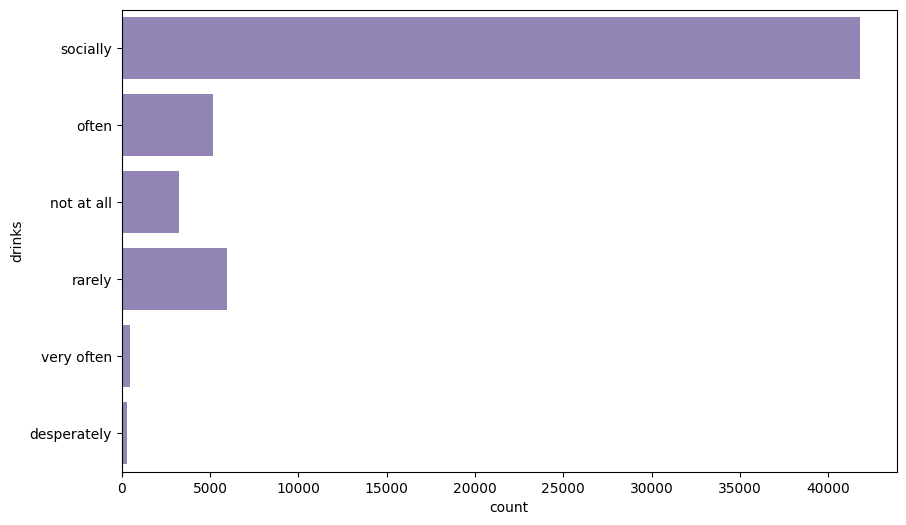

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='drinks', color='#8E7DBE')
plt.show()

### Drugs

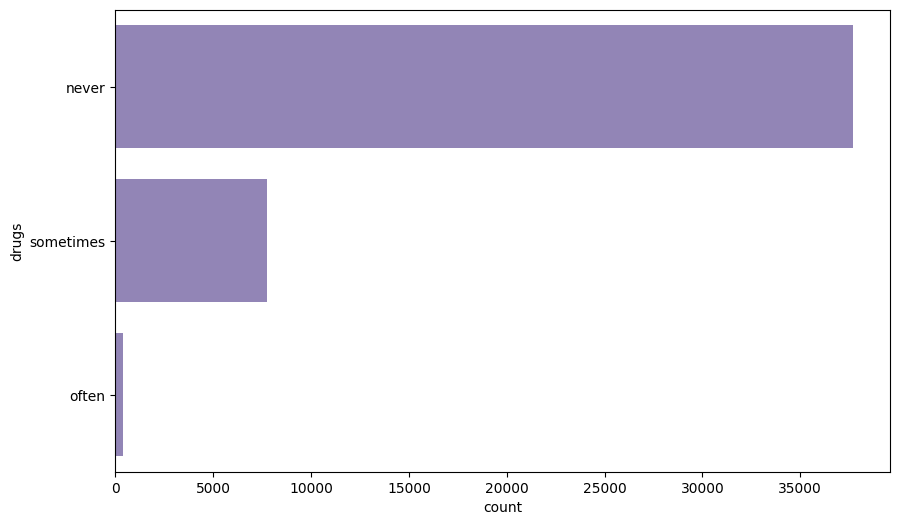

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='drugs', color='#8E7DBE')
plt.show()

### Education

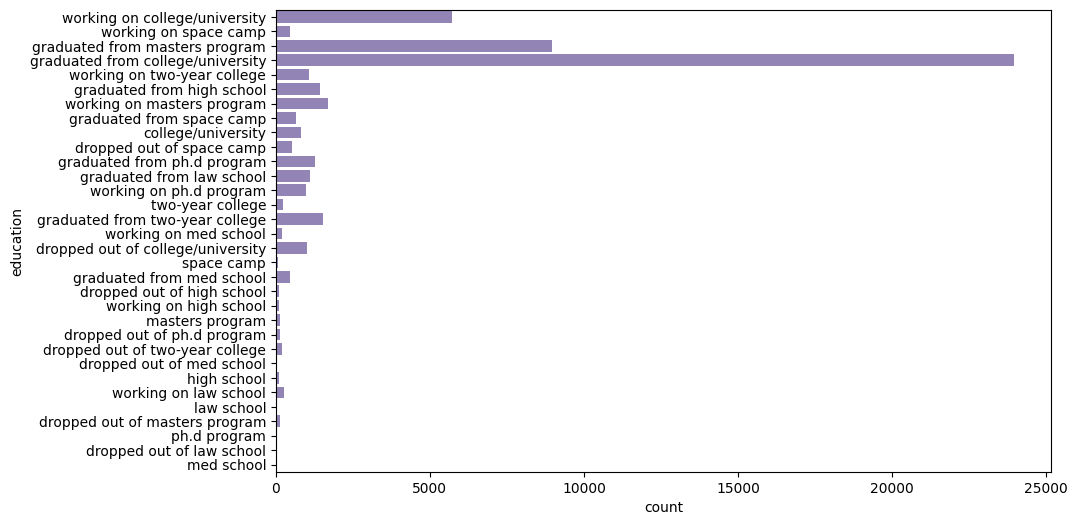

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='education', color='#8E7DBE')
plt.show()

### Job

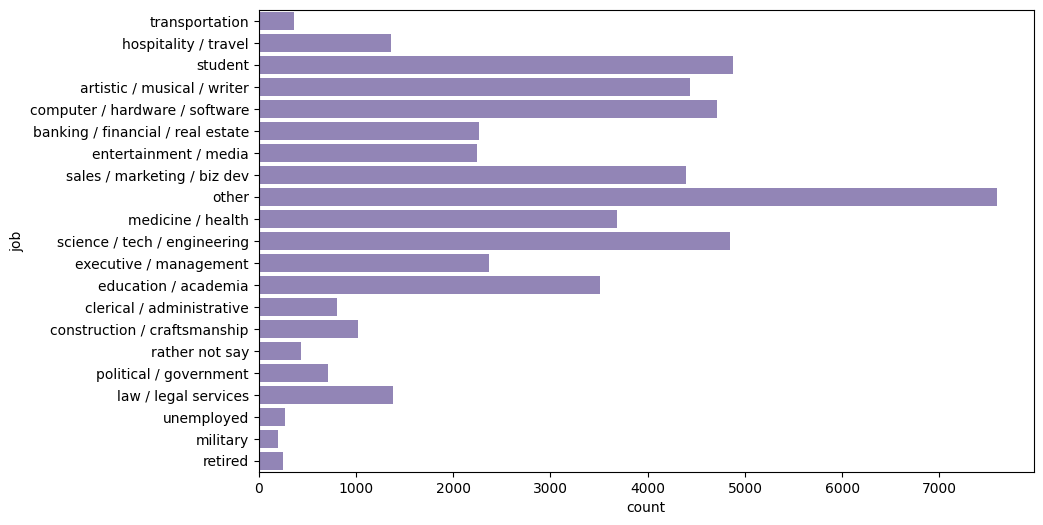

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job', color='#8E7DBE')
plt.show()

### Offspring

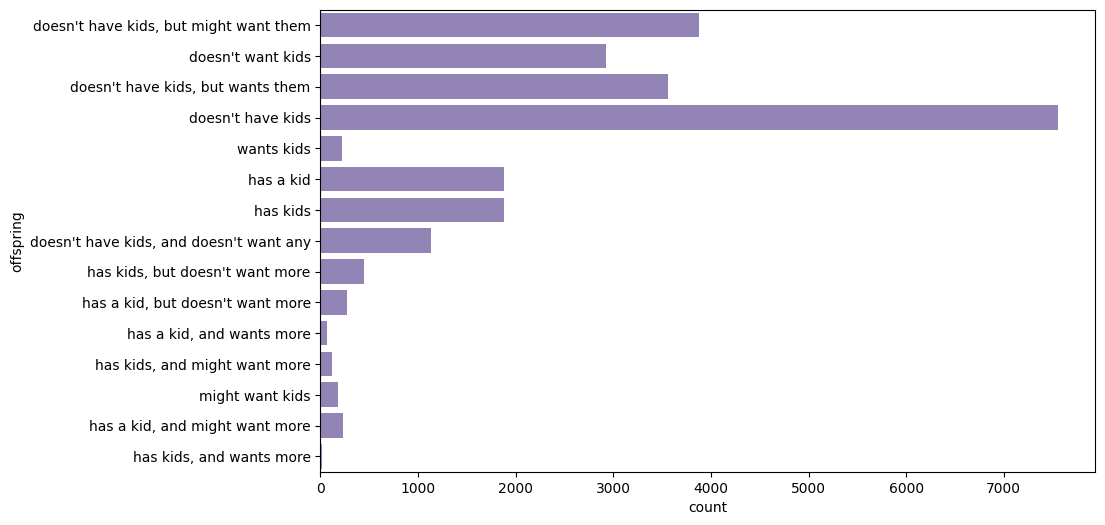

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='offspring', color='#8E7DBE')
plt.show()

### Pets

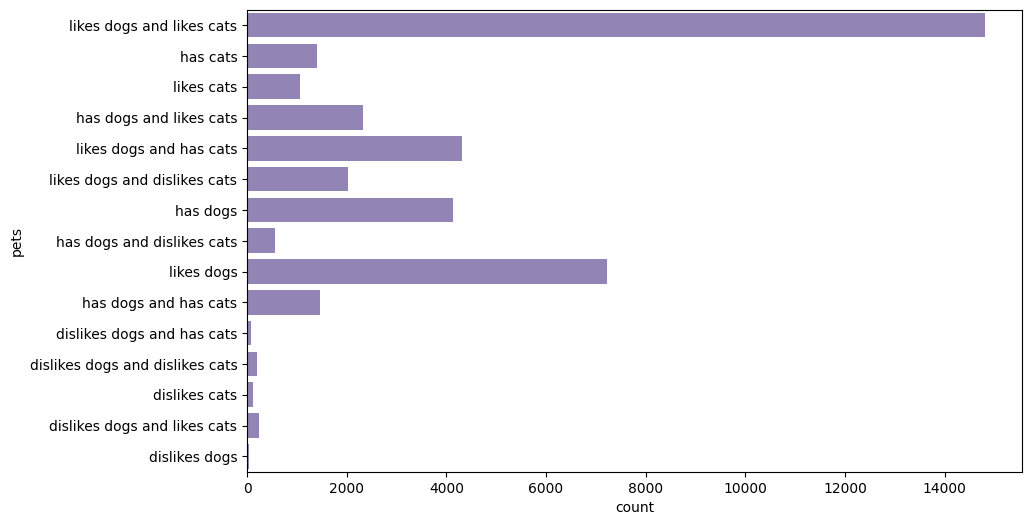

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='pets', color='#8E7DBE')
plt.show()

### Religion

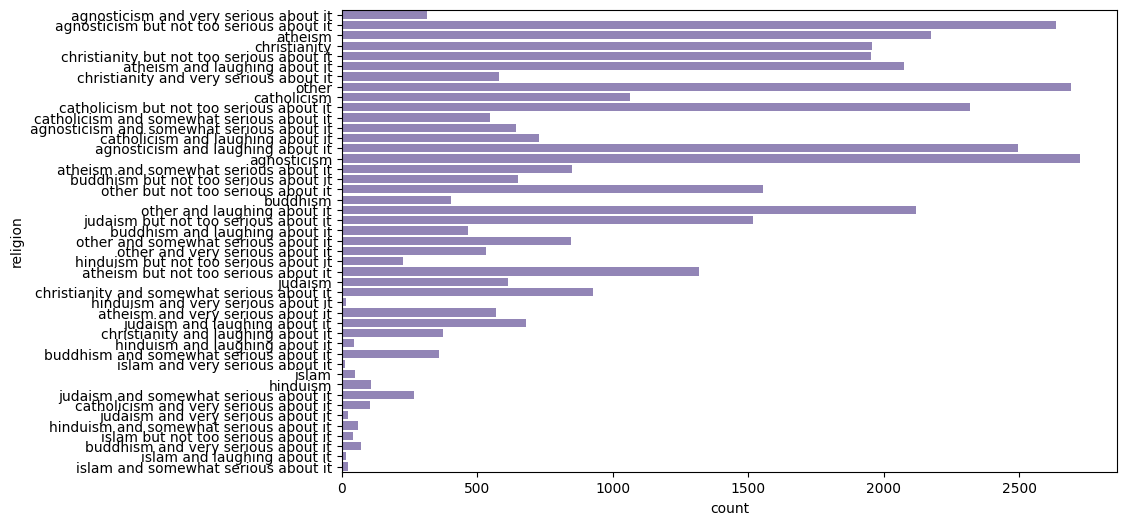

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='religion', color='#8E7DBE')
plt.show()

### Sign

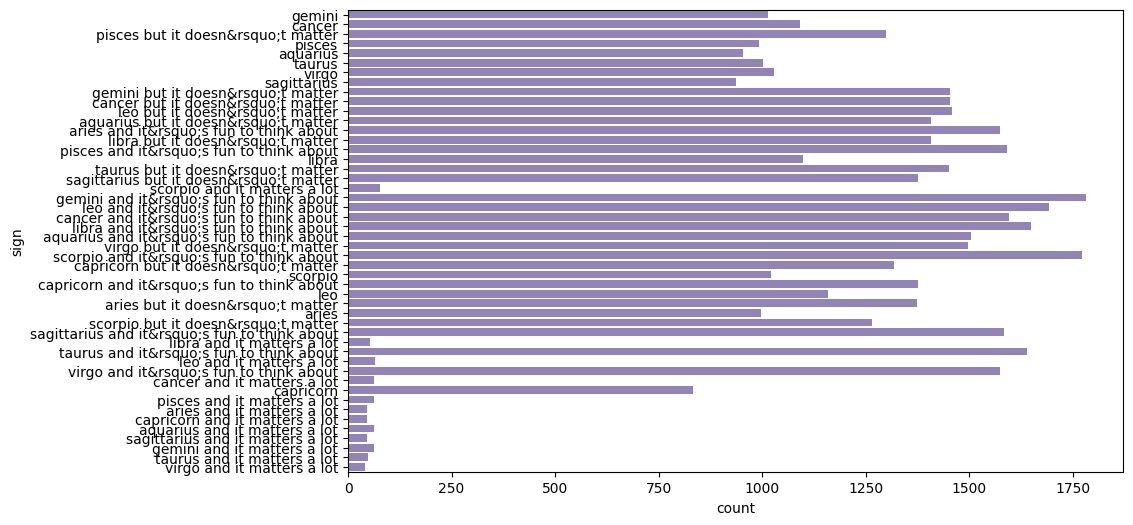

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='sign', color='#8E7DBE')
plt.show()

### Smokes

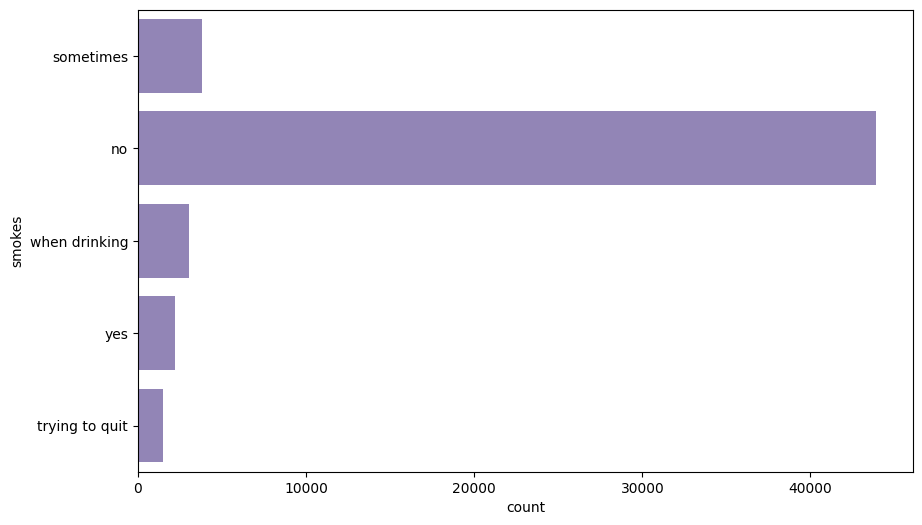

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='smokes', color='#8E7DBE')
plt.show()

# **Pre-Processing**

In [ ]:
df_clean = df.copy()

## Deleting Duplicate Value

In [ ]:
print("Jumlah data duplikat:", df_clean.duplicated().sum())

if df_clean.duplicated().sum() > 0:
    print("\nData duplikat:")
    display(df_clean[df_clean.duplicated()].sort_values(by=df_clean.columns.tolist()))
else:
    print("\nTidak ada data duplikat")

Jumlah data duplikat: 0

Tidak ada data duplikat


In [ ]:
df_clean = df_clean.drop_duplicates()

## Delete Null Value

In [ ]:
df_clean.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

In [ ]:
# Membuat DataFrame baru tanpa kolom yang tidak diperlukan
columns_to_drop = ['ethnicity'] + [f'essay{i}' for i in range(10)]  # Menyusun list kolom yang ingin di-drop

# Menghapus kolom yang tidak diinginkan
df_clean = df.drop(columns=columns_to_drop)

# Menampilkan DataFrame baru
df_clean

age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          education  height  \
0        socially      never      working on college/university    75.0   
1           often  sometimes              working on space camp    70.0   
2        socially        NaN     graduated from masters program    68.0   
3        socially        NaN      working on college/university    71.0   
4        socially      never  graduated from college/university    66.0   
...           ...        ...                                ...     ...   
59941    socially      never  graduated from college/university    62.0   
59942       often  sometimes      working on college/university    72.0   
59943  not at all      never     graduated from masters program    71.0   
59944    socially      often      working on college/university    73.0   
59945    socially        NaN     graduated from masters program    68.0   

       income                           job       last_online  \
0          -1                transportation  2012-06-28-20-30   
1       80000          hospitality / travel  2012-06-29-21-41   
2          -1                           NaN  2012-06-27-09-10   
3       20000                       student  2012-06-28-14-22   
4          -1   artistic / musical / writer  2012-06-27-21-26   
...       ...                           ...               ...   
59941      -1   sales / marketing / biz dev  2012-06-12-21-47   
59942      -1         entertainment / media  2012-06-29-11-01   
59943  100000  construction / craftsmanship  2012-06-27-23-37   
59944      -1             medicine / health  2012-06-23-13-01   
59945      -1             medicine / health  2012-06-29-00-42   

                              location  \
0      south san francisco, california   
1                  oakland, california   
2            san francisco, california   
3                 berkeley, california   
4            san francisco, california   
...                                ...   
59941              oakland, california   
59942        san francisco, california   
59943  south san francisco, california   
59944        san francisco, california   
59945        san francisco, california   

                                    offspring                       pets  \
0      doesn't have kids, but might want them  likes dogs and likes cats   
1      doesn't have kids, but might want them  likes dogs and likes cats   
2                                         NaN                   has cats   
3                           doesn't want kids                 likes cats   
4                                         NaN  likes dogs and likes cats   
...                                       ...                        ...   
59941                                has kids                   has dogs   
59942                       doesn't have kids  likes dogs and likes cats   
59943                       doesn't have kids                        NaN   
59944       doesn't have kids, but wants them  likes dogs and likes cats   
59945                                     NaN  likes dogs and likes cat

### Delete Row

In [ ]:
#df_clean = df_clean.dropna()
#print("Sesudah:", len(df_clean))

### Delete ows based on the most number of null values

## Grouping categorical data

### Religion

In [ ]:
df_clean['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [ ]:
df_clean['religion'] = df_clean['religion'].str.split().str[0]

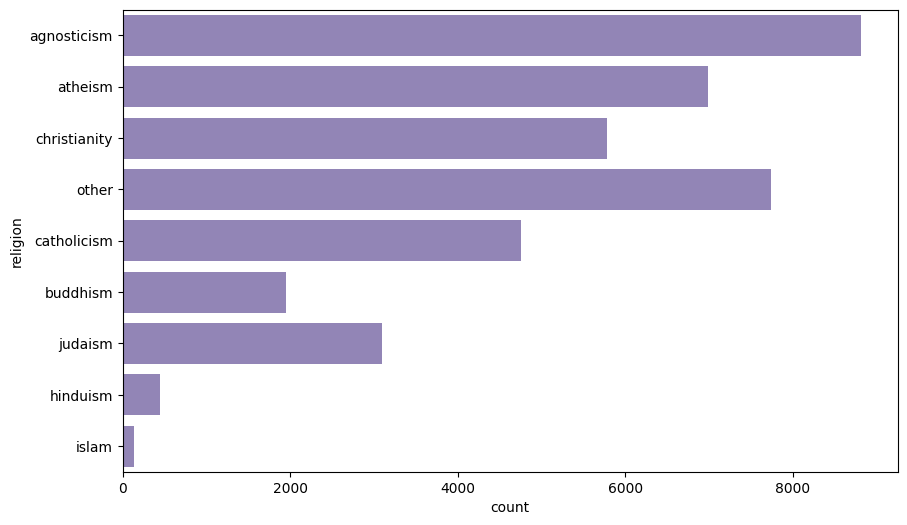

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, y='religion', color='#8E7DBE')
plt.show()

### Sign

In [ ]:
df_clean['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [ ]:
df_clean['sign'] = df_clean['sign'].str.split().str[0]

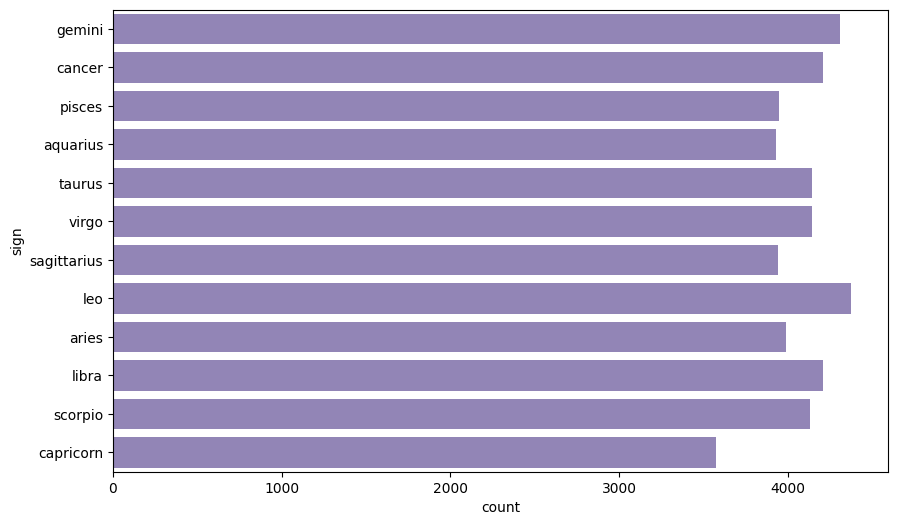

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, y='sign', color='#8E7DBE')
plt.show()

## Change Datatype

In [ ]:
df_clean['last_online'] = pd.to_datetime(
    df_clean['last_online'],
    format='%Y-%m-%d-%H-%M')

## Split `location`

In [ ]:
df_clean[['city', 'state']] = df_clean['location'].str.split(',', n=1, expand=True)

In [ ]:
# Clean whitespace
df_clean['city'] = df_clean['city'].str.strip()
df_clean['state'] = df_clean['state'].str.strip()

### Get latitude n longitude

In [ ]:
df_loc = pd.DataFrame(df_clean['location'].unique(), columns=['location'])
df_loc

location
0    south san francisco, california
1                oakland, california
2          san francisco, california
3               berkeley, california
4      belvedere tiburon, california
..                               ...
194                 denver, colorado
195              seattle, washington
196                 cincinnati, ohio
197                 phoenix, arizona
198              rochester, michigan

[199 rows x 1 columns]

In [ ]:
# Delete location
df_clean = df_clean.drop('location', axis=1)

# Exploratory Data Analysis

In [ ]:
df_clean['city'].unique()

array(['south san francisco', 'oakland', 'san francisco', 'berkeley',
       'belvedere tiburon', 'san mateo', 'daly city', 'san leandro',
       'atherton', 'san rafael', 'walnut creek', 'menlo park', 'belmont',
       'san jose', 'palo alto', 'emeryville', 'el granada',
       'castro valley', 'fairfax', 'mountain view', 'burlingame',
       'martinez', 'pleasant hill', 'hayward', 'alameda', 'vallejo',
       'benicia', 'el cerrito', 'mill valley', 'richmond', 'redwood city',
       'el sobrante', 'stanford', 'san pablo', 'novato', 'pacifica',
       'lafayette', 'half moon bay', 'fremont', 'orinda', 'san anselmo',
       'corte madera', 'albany', 'san carlos', 'san lorenzo',
       'foster city', 'hercules', 'santa cruz', 'bolinas', 'sausalito',
       'millbrae', 'larkspur', 'moraga', 'san bruno', 'petaluma',
       'pinole', 'san geronimo', 'crockett', 'boulder', 'brisbane',
       'freedom', 'montara', 'green brae', 'woodside', 'new york', 'ross',
       'east palo alto', 'san qu

In [ ]:
df_clean.describe()

age        height          income  \
count  59946.000000  59943.000000    59946.000000   
mean      32.340290     68.295281    20033.222534   
min       18.000000      1.000000       -1.000000   
25%       26.000000     66.000000       -1.000000   
50%       30.000000     68.000000       -1.000000   
75%       37.000000     71.000000       -1.000000   
max      110.000000     95.000000  1000000.000000   
std        9.452779      3.994803    97346.192104   

                         last_online  
count                          59946  
mean   2012-05-22 06:43:35.300770560  
min              2011-06-27 01:52:00  
25%              2012-05-29 20:37:15  
50%              2012-06-27 14:30:00  
75%              2012-06-30 01:09:00  
max              2012-07-01 08:57:00  
std                              NaN

In [ ]:
df_clean

age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          education  height  \
0        socially      never      working on college/university    75.0   
1           often  sometimes              working on space camp    70.0   
2        socially        NaN     graduated from masters program    68.0   
3        socially        NaN      working on college/university    71.0   
4        socially      never  graduated from college/university    66.0   
...           ...        ...                                ...     ...   
59941    socially      never  graduated from college/university    62.0   
59942       often  sometimes      working on college/university    72.0   
59943  not at all      never     graduated from masters program    71.0   
59944    socially      often      working on college/university    73.0   
59945    socially        NaN     graduated from masters program    68.0   

       income                           job         last_online  \
0          -1                transportation 2012-06-28 20:30:00   
1       80000          hospitality / travel 2012-06-29 21:41:00   
2          -1                           NaN 2012-06-27 09:10:00   
3       20000                       student 2012-06-28 14:22:00   
4          -1   artistic / musical / writer 2012-06-27 21:26:00   
...       ...                           ...                 ...   
59941      -1   sales / marketing / biz dev 2012-06-12 21:47:00   
59942      -1         entertainment / media 2012-06-29 11:01:00   
59943  100000  construction / craftsmanship 2012-06-27 23:37:00   
59944      -1             medicine / health 2012-06-23 13:01:00   
59945      -1             medicine / health 2012-06-29 00:42:00   

                                    offspring                       pets  \
0      doesn't have kids, but might want them  likes dogs and likes cats   
1      doesn't have kids, but might want them  likes dogs and likes cats   
2                                         NaN                   has cats   
3                           doesn't want kids                 likes cats   
4                                         NaN  likes dogs and likes cats   
...                                       ...                        ...   
59941                                has kids                   has dogs   
59942                       doesn't have kids  likes dogs and likes cats   
59943                       doesn't have kids                        NaN   
59944       doesn't have kids, but wants them  likes dogs and likes cats   
59945                                     NaN  likes dogs and likes cats   

           religion         sign          smokes  \
0       agnosticism       gemini       sometimes   
1       agnosticism       cancer              no   
2               NaN       pisces              no   
3               NaN       pisces              no   
4               NaN     aquarius              no   
...             ...          ...             ...   
59941   catholicism       cancer              no   
59942   agnosticism          leo              no   
59943  

## Mencari kolom dengan korelasi tinggi


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df_clean.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])


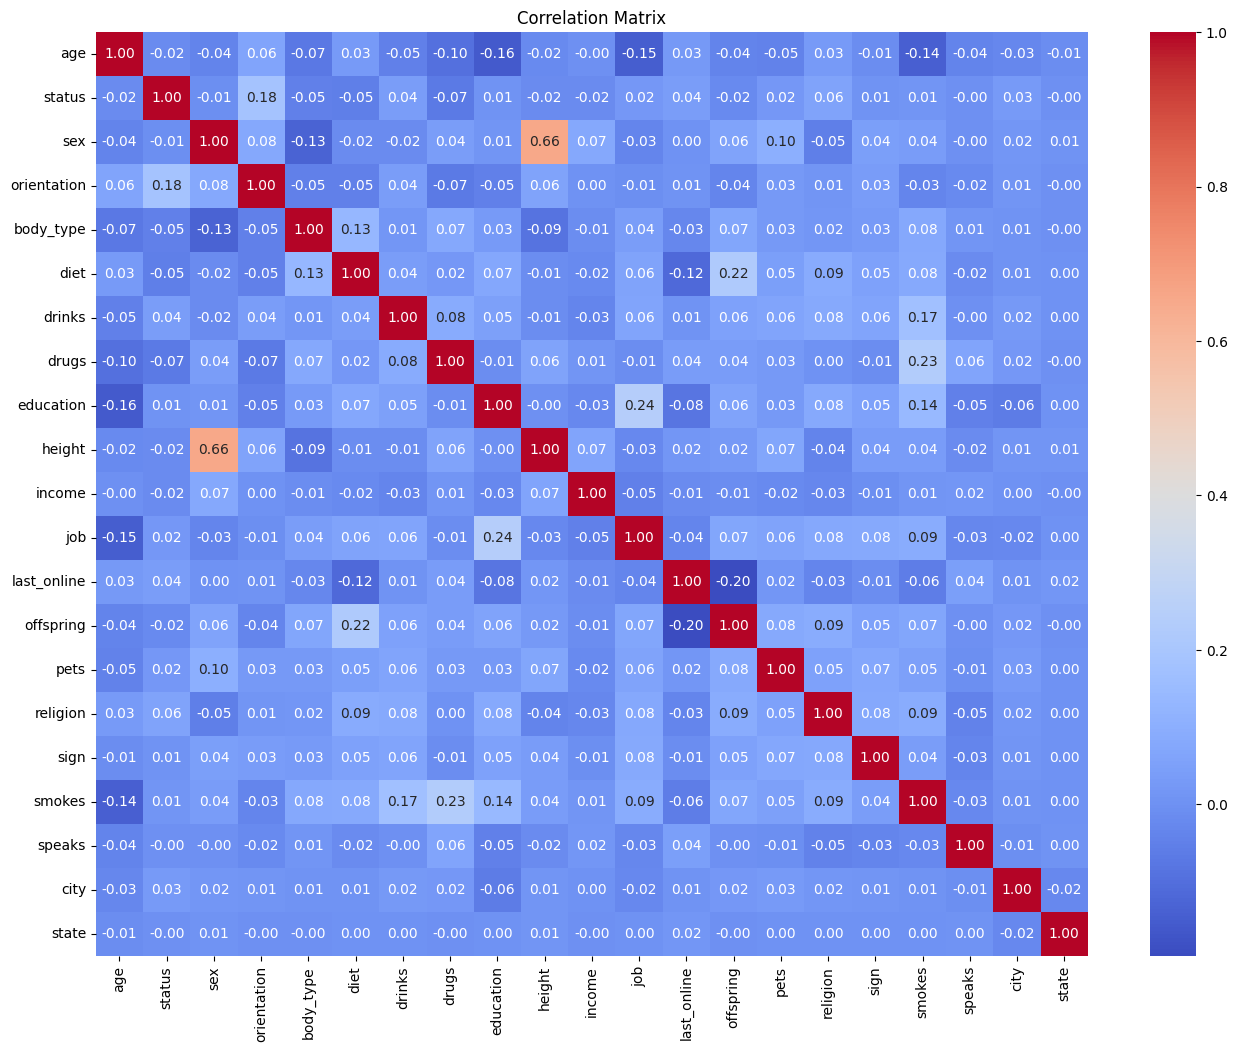

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df_clean['state'].unique()

array(['california', 'colorado', 'new york', 'oregon', 'arizona',
       'hawaii', 'montana', 'wisconsin', 'virginia', 'spain', 'nevada',
       'illinois', 'vietnam', 'ireland', 'louisiana', 'michigan', 'texas',
       'united kingdom', 'massachusetts', 'north carolina', 'idaho',
       'mississippi', 'new jersey', 'florida', 'minnesota', 'georgia',
       'utah', 'washington', 'west virginia', 'connecticut', 'tennessee',
       'rhode island', 'district of columbia', 'british columbia, canada',
       'missouri', 'germany', 'pennsylvania', 'netherlands',
       'switzerland', 'mexico', 'ohio'], dtype=object)

## Mengambil Kolom yang dipilih

In [ ]:
selected_columns = ['age', 'education', 'offspring', 'smokes',
                    'drugs', 'job', 'religion', 'orientation', 'drinks', 'state',
                    'status', 'diet']

df2 = df_clean[selected_columns].copy()

# Jika ingin cek hasilnya:
df2

age                          education  \
0       22      working on college/university   
1       35              working on space camp   
2       38     graduated from masters program   
3       23      working on college/university   
4       29  graduated from college/university   
...    ...                                ...   
59941   59  graduated from college/university   
59942   24      working on college/university   
59943   42     graduated from masters program   
59944   27      working on college/university   
59945   39     graduated from masters program   

                                    offspring          smokes      drugs  \
0      doesn't have kids, but might want them       sometimes      never   
1      doesn't have kids, but might want them              no  sometimes   
2                                         NaN              no        NaN   
3                           doesn't want kids              no        NaN   
4                                         NaN              no      never   
...                                       ...             ...        ...   
59941                                has kids              no      never   
59942                       doesn't have kids              no  sometimes   
59943                       doesn't have kids              no      never   
59944       doesn't have kids, but wants them  trying to quit      often   
59945                                     NaN       sometimes        NaN   

                                job      religion orientation      drinks  \
0                    transportation   agnosticism    straight    socially   
1              hospitality / travel   agnosticism    straight       often   
2                               NaN           NaN    straight    socially   
3                           student           NaN    straight    socially   
4       artistic / musical / writer           NaN    straight    socially   
...                             ...           ...         ...         ...   
59941   sales / marketing / biz dev   catholicism    straight    socially   
59942         entertainment / media   agnosticism    straight       often   
59943  construction / craftsmanship  christianity    straight  not at all   
59944             medicine / health   agnosticism    straight    socially   
59945             medicine / health   catholicism         gay    socially   

            state     status               diet  
0      california     single  strictly anything  
1      california     single       mostly other  
2      california  available           anything  
3      california     single         vegetarian  
4      california     single                NaN  
...           ...        ...                ...  
59941  california     single                NaN  
59942  california     single    mostly anything  
59943  california     single    mostly anything  
59944  california     single    mostly anything  
59945  california     single                NaN  

[59946 rows x 12 columns]

## Menghapus Missing Value Setelah Pemilihan Kolom

In [ ]:
df2 = df2.dropna()
df2.shape

(9922, 12)

In [ ]:
df3 = df2.copy()

## Outlier Usia df

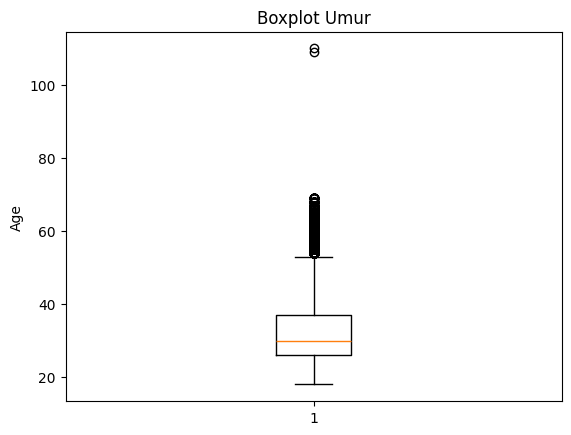

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])
plt.title("Boxplot Umur")
plt.ylabel("Age")
plt.show()

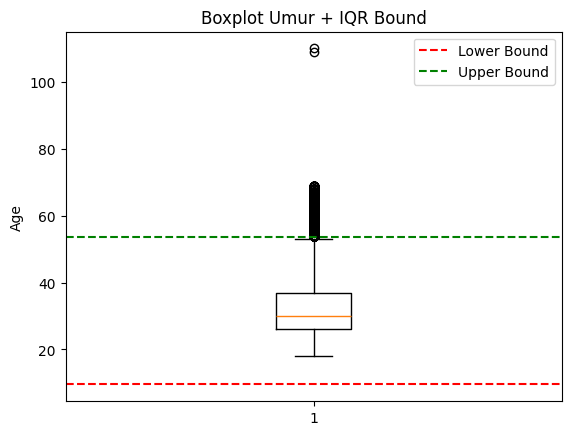

In [ ]:
import matplotlib.pyplot as plt

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

plt.boxplot(df['age'])
plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper, color='green', linestyle='--', label='Upper Bound')
plt.title("Boxplot Umur + IQR Bound")
plt.ylabel("Age")
plt.legend()
plt.show()


In [ ]:
# Misal kolom umur = 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Cek nilai-nilai yang outlier
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")
print("Outlier values:")
print(outliers['age'].sort_values().unique())


Q1 (25%): 26.0
Q3 (75%): 37.0
IQR: 11.0
Lower Bound: 9.5
Upper Bound: 53.5
Jumlah outlier: 2638
Outlier values:
[ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69 109 110]


## Cosine Similarity dan Metode Lovain
mengambil 1000 sampel, lalu difilter hanya yang california

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import community as community_louvain  # pip install python-louvain

# 1. Filter umur 18-53 dari df3
df_filtered = df3[(df3['age'] >= 18) & (df3['age'] <= 53)].copy()

# 2. Ambil 1000 data random dari hasil filter (jika data kurang dari 1000, ambil semua)
n_sample = 1000
if len(df_filtered) < n_sample:
    n_sample = len(df_filtered)
df_sample = df_filtered.sample(n=n_sample, random_state=42).copy()

# 3. Buat kelompok umur (age_group)
def age_group(age):
    if 18 <= age <= 23:
        return '18-23'
    elif 24 <= age <= 29:
        return '24-29'
    elif 30 <= age <= 35:
        return '30-35'
    elif 36 <= age <= 41:
        return '36-41'
    elif 42 <= age <= 47:
        return '42-47'
    elif 48 <= age <= 53:
        return '48-53'
    else:
        return 'other'

df_sample['age_group'] = df_sample['age'].apply(age_group)

# 4. Kolom kategorikal yang akan diencode
cat_cols = ['education', 'job', 'religion', 'orientation', 'drinks',
            'state', 'status', 'diet', 'offspring', 'smokes', 'drugs', 'age_group']

df_sample = df_sample[df_sample['state'] == 'california'].copy()

df_encoded = df_sample.copy()

# 6. Encoding
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# 7. Scaling fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[cat_cols])

# 8. Hitung similarity
sim_matrix = cosine_similarity(df_scaled)

# 9. Buat graph dari similarity
threshold = 0.7
G = nx.Graph()
n = len(df_scaled)

for i in range(n):
    G.add_node(i)

for i in range(n):
    for j in range(i + 1, n):
        if sim_matrix[i, j] > threshold:
            G.add_edge(i, j, weight=sim_matrix[i, j])

# 10. Louvain community detection
partition = community_louvain.best_partition(G, weight='weight')

# 11. Tambahkan hasil ke df_sample
df_sample['community'] = df_sample.index.map(partition)

# 11. Tampilkan hasil partition (node ke komunitas)
print(partition)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 2, 8: 2, 9: 7, 10: 1, 11: 8, 12: 9, 13: 6, 14: 6, 15: 0, 16: 6, 17: 1, 18: 0, 19: 9, 20: 6, 21: 2, 22: 9, 23: 0, 24: 1, 25: 0, 26: 2, 27: 8, 28: 7, 29: 7, 30: 9, 31: 3, 32: 1, 33: 2, 34: 8, 35: 2, 36: 5, 37: 6, 38: 0, 39: 9, 40: 2, 41: 8, 42: 2, 43: 5, 44: 3, 45: 9, 46: 1, 47: 6, 48: 1, 49: 9, 50: 0, 51: 2, 52: 0, 53: 6, 54: 8, 55: 6, 56: 6, 57: 7, 58: 3, 59: 2, 60: 0, 61: 6, 62: 2, 63: 5, 64: 1, 65: 2, 66: 0, 67: 5, 68: 0, 69: 2, 70: 4, 71: 2, 72: 4, 73: 6, 74: 4, 75: 7, 76: 3, 77: 6, 78: 0, 79: 0, 80: 7, 81: 4, 82: 4, 83: 1, 84: 6, 85: 0, 86: 2, 87: 0, 88: 3, 89: 2, 90: 1, 91: 9, 92: 1, 93: 1, 94: 5, 95: 3, 96: 6, 97: 0, 98: 7, 99: 1, 100: 8, 101: 2, 102: 0, 103: 8, 104: 6, 105: 1, 106: 6, 107: 9, 108: 5, 109: 4, 110: 2, 111: 8, 112: 0, 113: 6, 114: 4, 115: 9, 116: 7, 117: 0, 118: 5, 119: 6, 120: 4, 121: 2, 122: 5, 123: 9, 124: 8, 125: 3, 126: 5, 127: 2, 128: 0, 129: 0, 130: 6, 131: 4, 132: 7, 133: 9, 134: 1, 135: 0, 136: 0, 137: 3, 138: 

In [ ]:
df_filtered.describe()

age
count  9128.000000
mean     31.697853
std       8.381795
min      18.000000
25%      25.000000
50%      30.000000
75%      37.000000
max      53.000000

## Visualisasi Graf

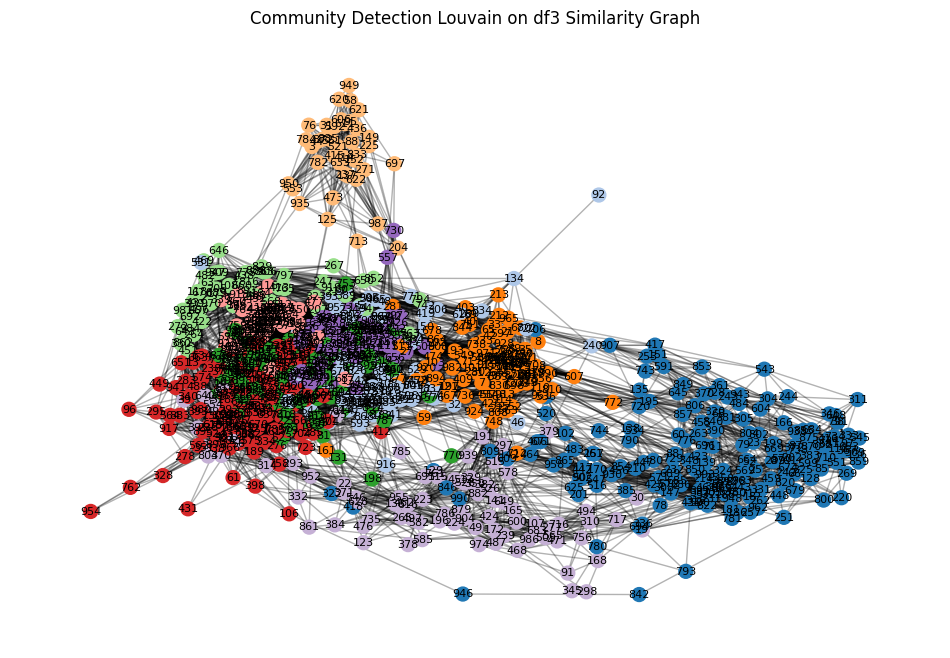

In [ ]:
import matplotlib.pyplot as plt
import community as community_louvain
import networkx as nx

# Misal 'partition' dan 'G' sudah ada dari kode sebelumnya

# 1. Buat warna untuk tiap komunitas
# Ambil daftar komunitas unik
communities = set(partition.values())
# Buat warna random untuk komunitas
import random
random.seed(42)
colors = [plt.cm.tab20(i) for i in range(len(communities))]

# 2. Buat mapping node ke warna
color_map = {}
for node, comm in partition.items():
    color_map[node] = colors[comm % len(colors)]

# 3. Posisi node (layout)
pos = nx.spring_layout(G, seed=42)

# 4. Gambar graph dengan warna node sesuai komunitas
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=100,
                       node_color=[color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Community Detection Louvain on df3 Similarity Graph')
plt.axis('off')
plt.show()

In [ ]:
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas: {num_communities}")

Jumlah komunitas: 10


In [ ]:
modularity = community_louvain.modularity(partition, G, weight='weight')
print("Modularity:", modularity)

Modularity: 0.6859815156606273


In [ ]:
df_sample['community'] = df_sample.index.map(partition)

In [ ]:
df_filtered['community'] = df_filtered.index.map(df_sample['community'])

In [ ]:
df_filtered

age                          education  \
0       22      working on college/university   
1       35              working on space camp   
7       31  graduated from college/university   
14      29      working on college/university   
19      33     graduated from masters program   
...    ...                                ...   
59923   22        working on two-year college   
59936   25  graduated from college/university   
59942   24      working on college/university   
59943   42     graduated from masters program   
59944   27      working on college/university   

                                    offspring          smokes      drugs  \
0      doesn't have kids, but might want them       sometimes      never   
1      doesn't have kids, but might want them              no  sometimes   
7           doesn't have kids, but wants them              no      never   
14          doesn't have kids, but wants them              no      never   
19                          doesn't have kids              no      never   
...                                       ...             ...        ...   
59923       doesn't have kids, but wants them       sometimes      never   
59936                       doesn't have kids              no      never   
59942                       doesn't have kids              no  sometimes   
59943                       doesn't have kids              no      never   
59944       doesn't have kids, but wants them  trying to quit      often   

                                job      religion orientation      drinks  \
0                    transportation   agnosticism    straight    socially   
1              hospitality / travel   agnosticism    straight       often   
7       artistic / musical / writer  christianity    straight    socially   
14                            other   catholicism    straight    socially   
19     science / tech / engineering   catholicism    straight    socially   
...                             ...           ...         ...         ...   
59923                       student         other    straight    socially   
59936                         other       atheism    straight    socially   
59942         entertainment / media   agnosticism    straight       often   
59943  construction / craftsmanship  christianity    straight  not at all   
59944             medicine / health   agnosticism    straight    socially   

            state  status               diet  community  
0      california  single  strictly anything        NaN  
1      california  single       mostly other        NaN  
7      california  single    mostly anything        NaN  
14     california  single    mostly anything        NaN  
19     california  single    mostly anything        NaN  
...           ...     ...                ...        ...  
59923  california  single  strictly anything        NaN  
59936  california  single    mostly anything        NaN  
59942  california  single    mostly anything        NaN  
59943  california  single    mostly anything        NaN  
59944  california  single    mostly anything        NaN  

[9128 rows x 13 columns]

In [ ]:
print(f"Jumlah total data: {len(df_sample)}")
print(f"Jumlah node di graph: {G.number_of_nodes()}")
print(f"Jumlah edge di graph: {G.number_of_edges()}")
print(f"Jumlah komunitas yang ditemukan: {len(set(partition.values()))}")
print(f"Jumlah node yang ada di partition: {len(partition)}")


Jumlah total data: 995
Jumlah node di graph: 995
Jumlah edge di graph: 14896
Jumlah komunitas yang ditemukan: 10
Jumlah node yang ada di partition: 995


In [ ]:
import pandas as pd

# Misal partition adalah dict {node_id: community_id}
# Buat Series dari partition agar bisa dihitung jumlahnya per komunitas
community_series = pd.Series(partition)

# Hitung jumlah anggota tiap komunitas
counts = community_series.value_counts().sort_index()

print("Jumlah anggota tiap komunitas:")
print(counts)

print(f"\nKomunitas dengan anggota terbanyak: {counts.idxmax()} ({counts.max()} anggota)")
print(f"Komunitas dengan anggota tersedikit: {counts.idxmin()} ({counts.min()} anggota)")


Jumlah anggota tiap komunitas:
0    195
1     90
2    117
3     40
4     96
5     59
6    145
7     81
8     85
9     87
Name: count, dtype: int64

Komunitas dengan anggota terbanyak: 0 (195 anggota)
Komunitas dengan anggota tersedikit: 3 (40 anggota)


In [ ]:
df_sample = df_sample.reset_index(drop=True)

In [ ]:
# Tambahkan kolom community ke df_sample berdasarkan hasil partition
df_sample['community'] = df_sample.index.map(partition)

# Untuk melihat karakteristik komunitas, kita bisa lakukan groupby community
# dan tampilkan statistik ringkas (misal: rata-rata umur, mode tiap fitur kategorikal)

# Kalau kamu ingin lihat statistik numerik (misal age asli sebelum encoding):
print("Rata-rata umur tiap komunitas:")
print(df_sample.groupby('community')['age'].mean())

# Untuk fitur kategorikal (yang sudah di-encode), kita bisa ambil nilai mode tiap komunitas
print("\nMode fitur kategorikal tiap komunitas:")
mode_cat = df_sample.groupby('community')[cat_cols].agg(lambda x: x.mode().iloc[0])
print(mode_cat)

# Bisa juga untuk visualisasi mudah, misal jumlah anggota tiap komunitas
print("\nJumlah anggota tiap komunitas:")
print(df_sample['community'].value_counts())

# Jika kamu ingin melihat secara lebih detil, bisa export ke file csv:
mode_cat.to_csv("karakteristik_komunitas.csv")


Rata-rata umur tiap komunitas:
community
0    28.117949
1    30.622222
2    25.239316
3    33.550000
4    33.270833
5    33.440678
6    42.544828
7    30.382716
8    29.752941
9    29.160920
Name: age, dtype: float64

Mode fitur kategorikal tiap komunitas:
                                   education                             job  \
community                                                                      
0          graduated from college/university                           other   
1          graduated from college/university     sales / marketing / biz dev   
2              working on college/university                         student   
3          graduated from college/university     artistic / musical / writer   
4          graduated from college/university                           other   
5          graduated from college/university                           other   
6          graduated from college/university                           other   
7          graduated fr

In [ ]:
df_sample

age                          education  \
0     26  graduated from college/university   
1     26  graduated from college/university   
2     21      working on college/university   
3     36  graduated from college/university   
4     37         dropped out of high school   
..   ...                                ...   
990   42         graduated from high school   
991   39  graduated from college/university   
992   43     graduated from masters program   
993   18         graduated from high school   
994   35        graduated from ph.d program   

                                  offspring          smokes      drugs  \
0    doesn't have kids, but might want them  trying to quit  sometimes   
1                         doesn't have kids              no      never   
2                         doesn't have kids              no      never   
3           has kids, but doesn't want more              no      never   
4                         doesn't want kids              no      never   
..                                      ...             ...        ...   
990                       doesn't want kids             yes      never   
991                       doesn't have kids              no      never   
992                       doesn't have kids              no      never   
993                       doesn't want kids   when drinking  sometimes   
994       doesn't have kids, but wants them              no      never   

                                job      religion orientation    drinks  \
0             entertainment / media   catholicism    straight     often   
1       sales / marketing / biz dev   agnosticism    straight    rarely   
2                           student   catholicism    straight  socially   
3       sales / marketing / biz dev   agnosticism    straight  socially   
4       artistic / musical / writer         other    straight    rarely   
..                              ...           ...         ...       ...   
990          executive / management       judaism    straight    rarely   
991                           other       atheism    straight  socially   
992          political / government   agnosticism    straight  socially   
993     artistic / musical / writer       atheism    straight  socially   
994  computer / hardware / software  christianity    straight  socially   

          state     status               diet age_group  community  
0    california     single    mostly anything     24-29          0  
1    california     single  mostly vegetarian     24-29          1  
2    california     single    mostly anything     18-23          2  
3    california  available    mostly anything     36-41          3  
4    california     single       mostly vegan     36-41          4  
..          ...        ...                ...       ...        ...  
990  california     single    mostly anything     42-47          0  
991  california     single  mostly vegetarian     36-41          1  
992  california     single    mostly anything     42-47          6  
993  california     single  strictly anything     18-23          0  
994  california     single    mostly anything     30-35          7  

[995 rows x 14 columns]

## Visualisasi Grafik Tiap Komunitas

<Figure size 1200x600 with 0 Axes>

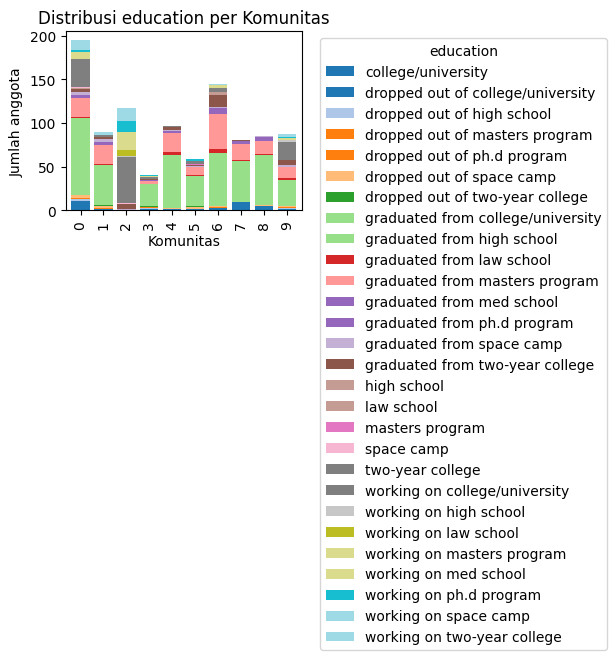

<Figure size 1200x600 with 0 Axes>

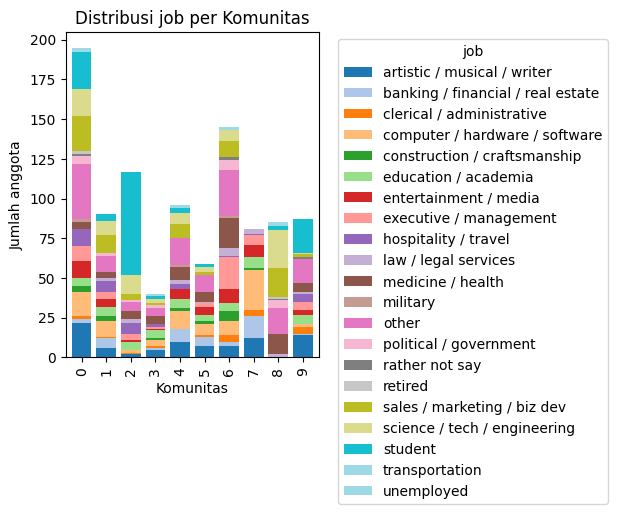

<Figure size 1200x600 with 0 Axes>

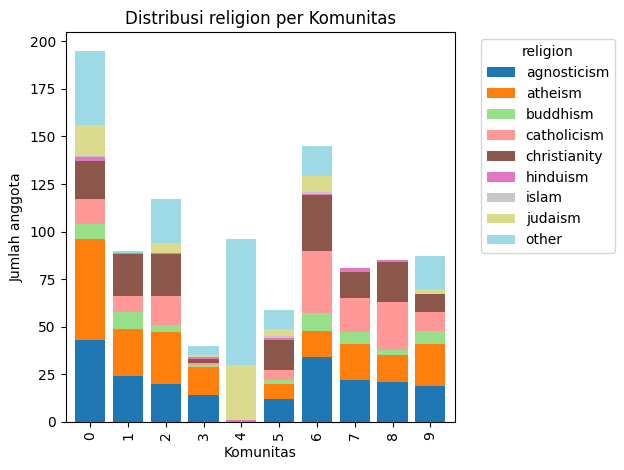

<Figure size 1200x600 with 0 Axes>

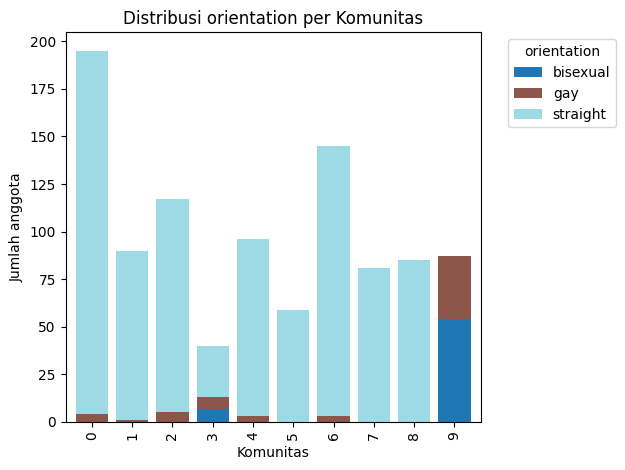

<Figure size 1200x600 with 0 Axes>

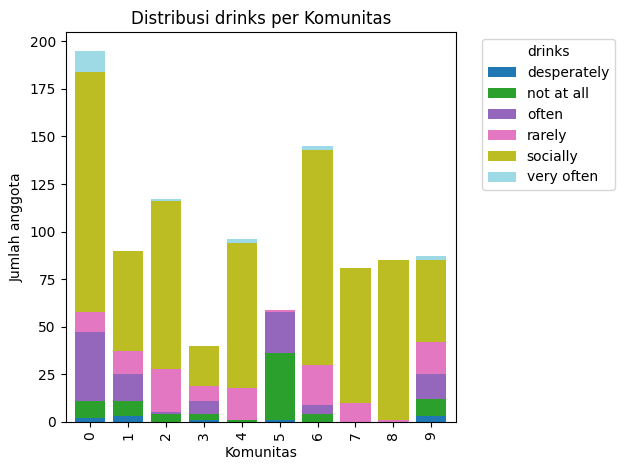

<Figure size 1200x600 with 0 Axes>

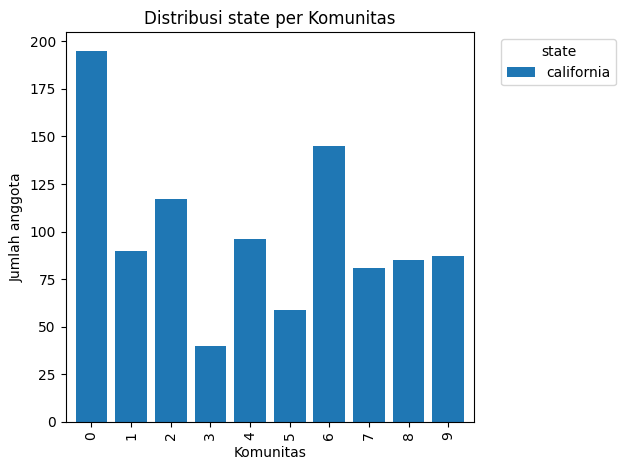

<Figure size 1200x600 with 0 Axes>

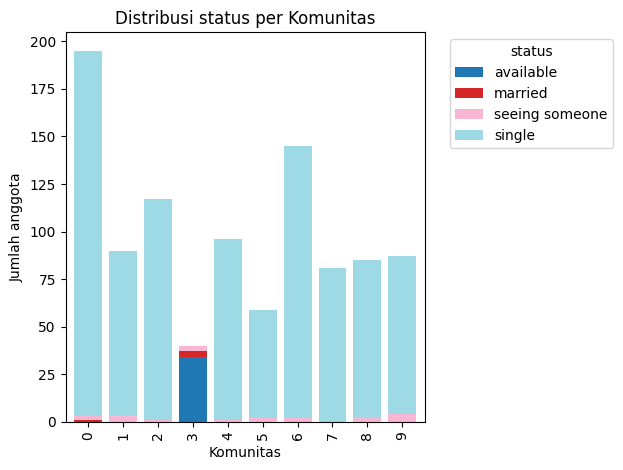

<Figure size 1200x600 with 0 Axes>

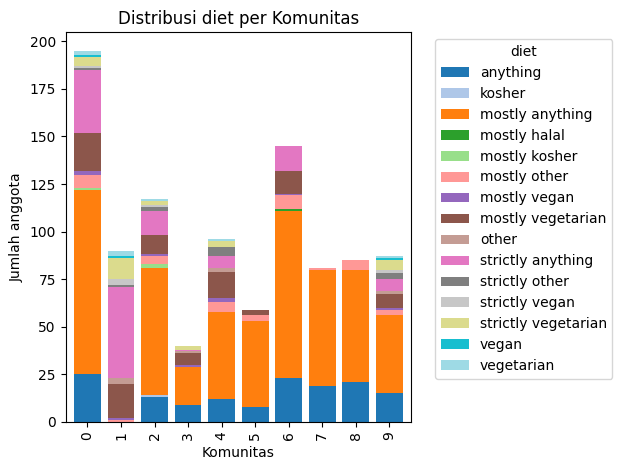

<Figure size 1200x600 with 0 Axes>

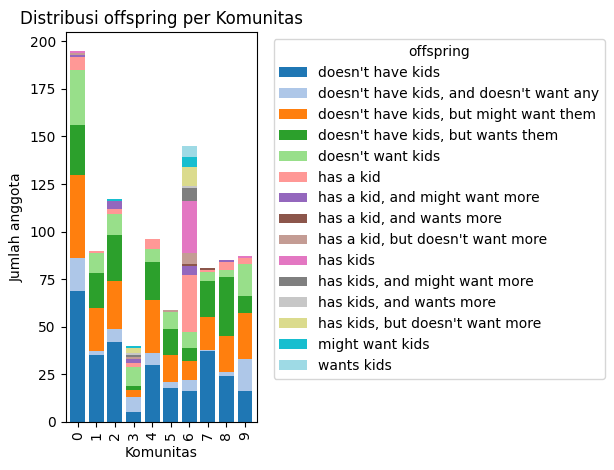

<Figure size 1200x600 with 0 Axes>

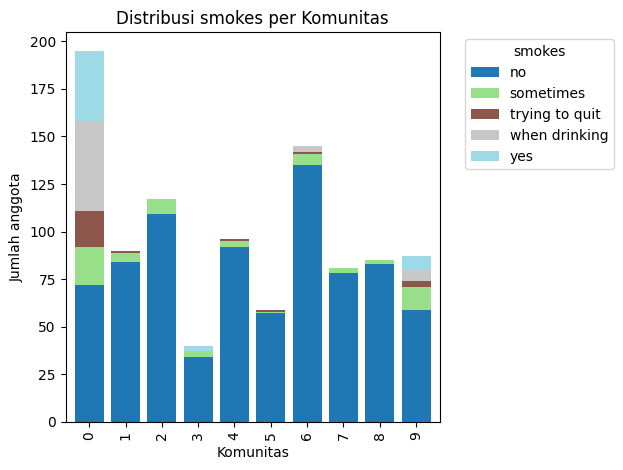

<Figure size 1200x600 with 0 Axes>

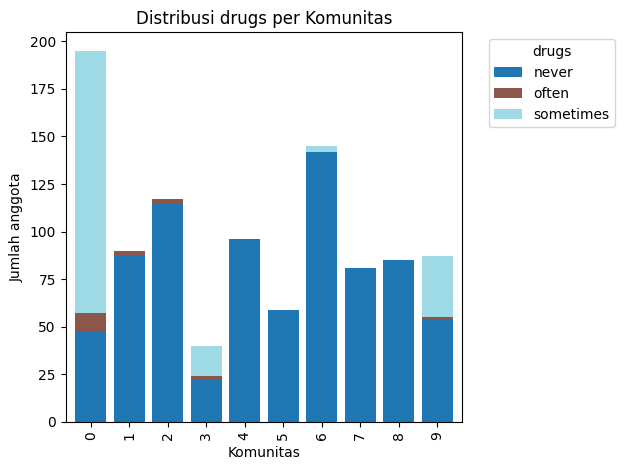

<Figure size 1200x600 with 0 Axes>

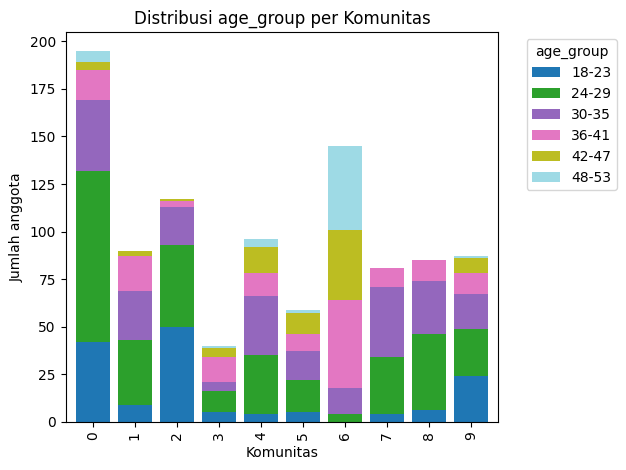

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi: df_sample sudah ada kolom 'community' dan kolom kategorikal asli (belum encode)
cat_cols = ['education', 'job', 'religion', 'orientation', 'drinks',
            'state', 'status', 'diet', 'offspring', 'smokes', 'drugs', 'age_group']

for col in cat_cols:
    plt.figure(figsize=(12,6))
    distrib = df_sample.groupby(['community', col]).size().unstack(fill_value=0)

    # Plot stacked bar chart
    distrib.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
    plt.title(f'Distribusi {col} per Komunitas')
    plt.xlabel('Komunitas')
    plt.ylabel('Jumlah anggota')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


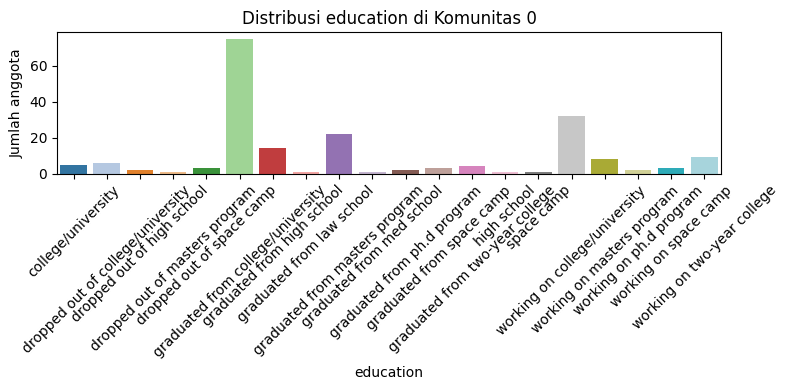

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


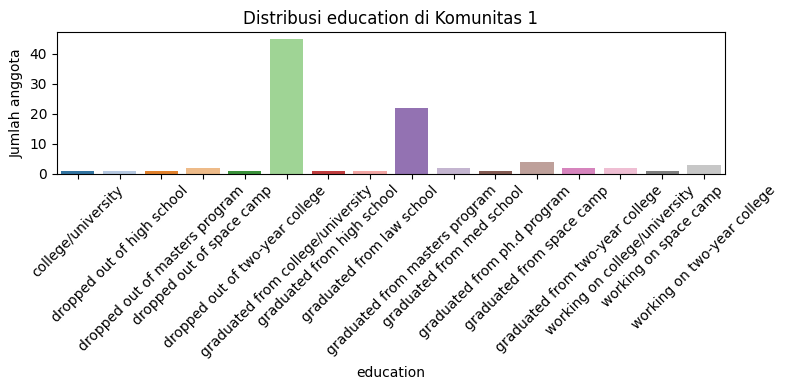

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


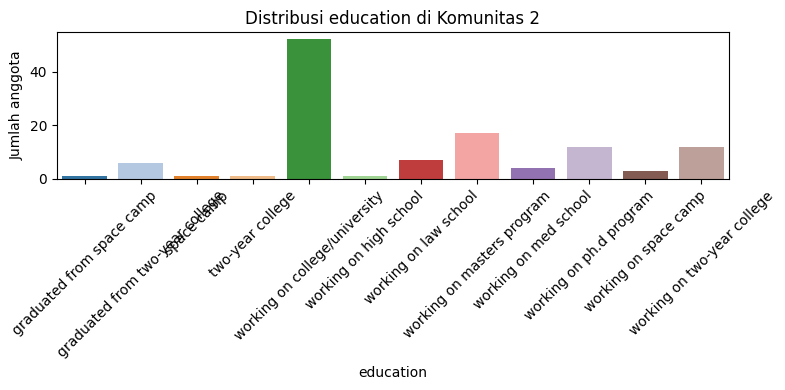

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


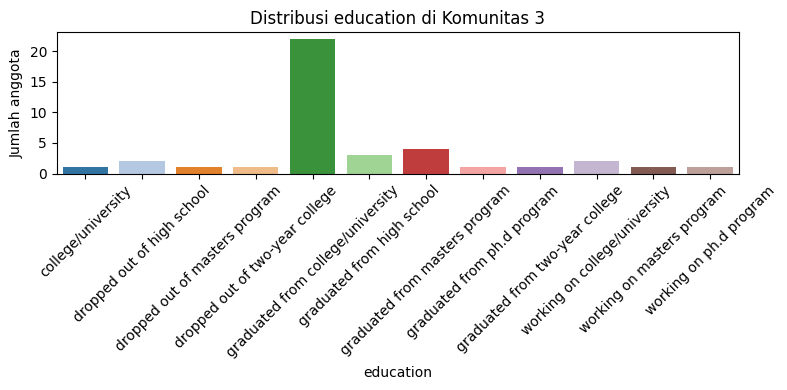

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


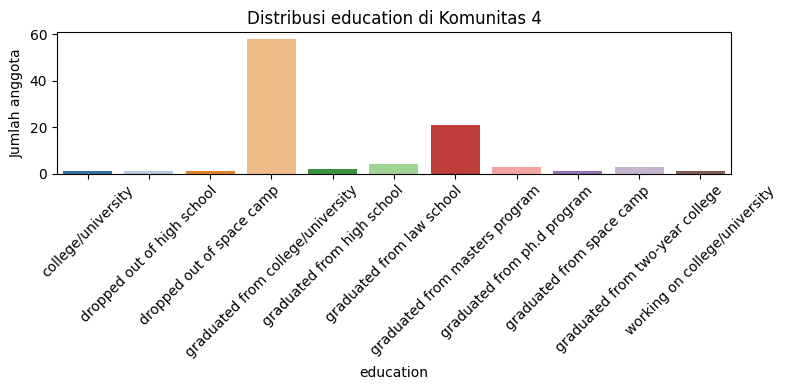

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


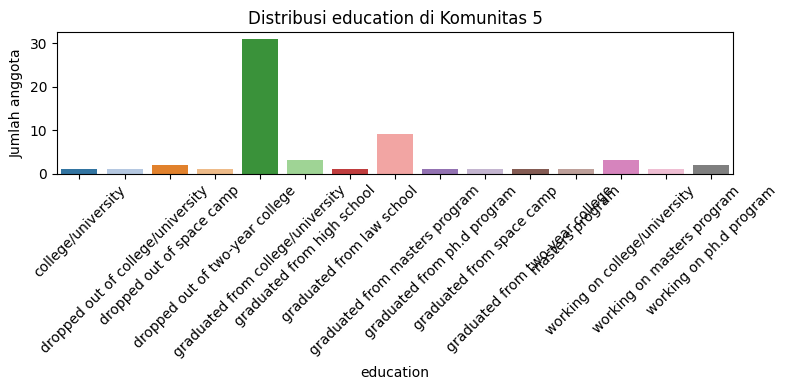

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


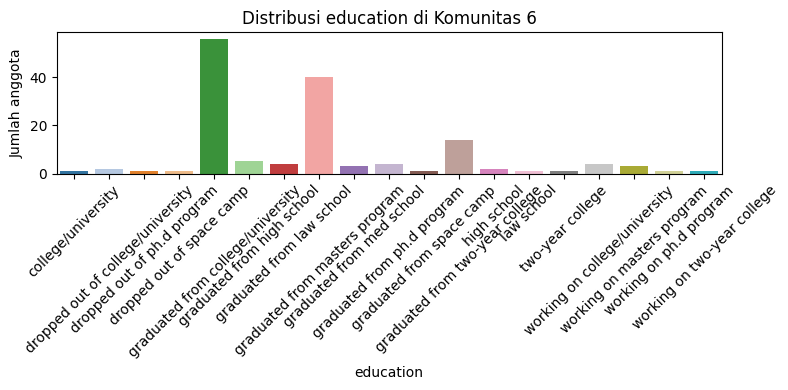

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


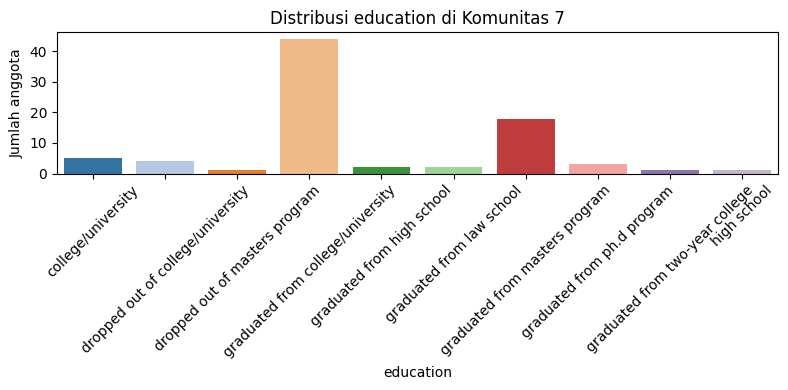

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


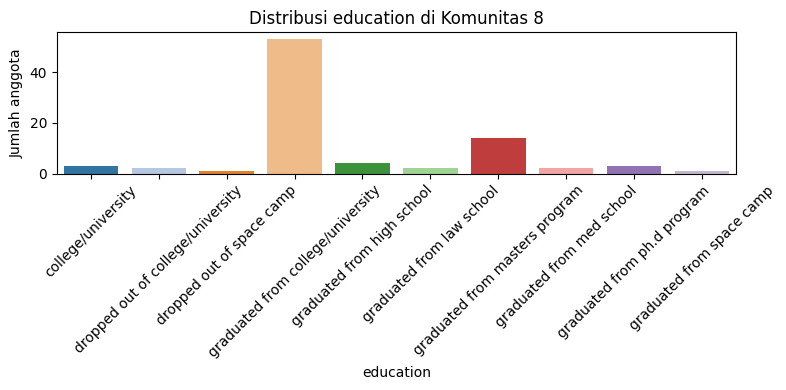

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


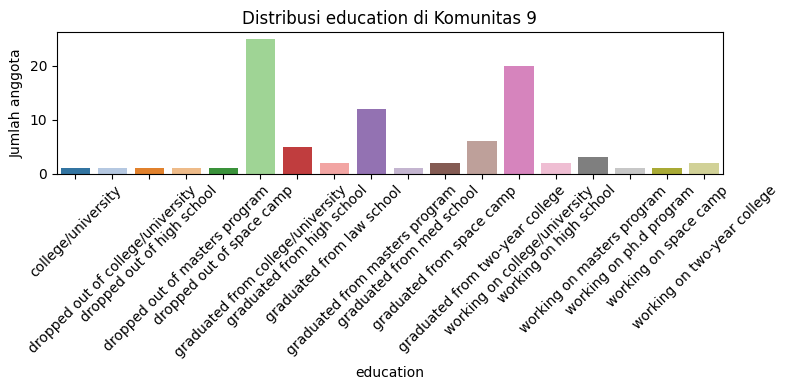

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


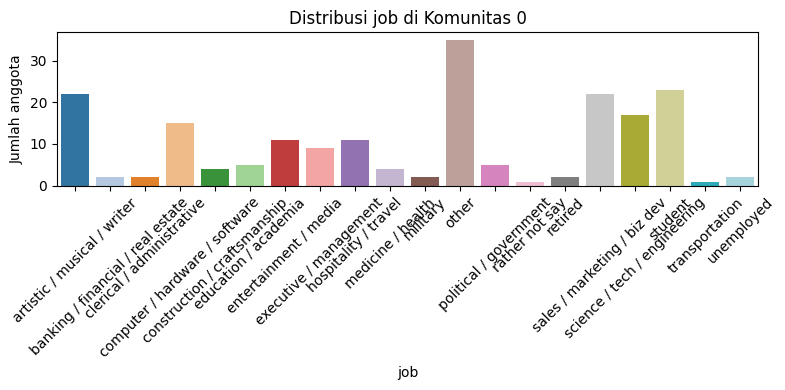

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


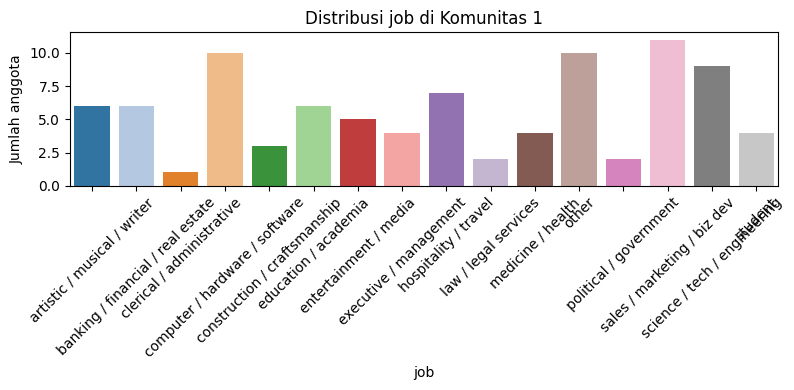

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


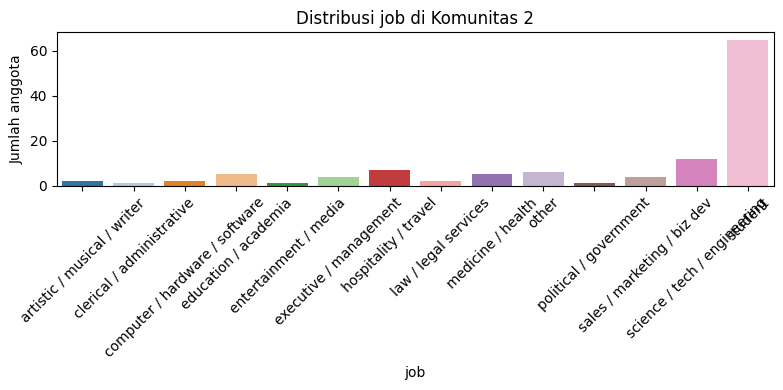

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


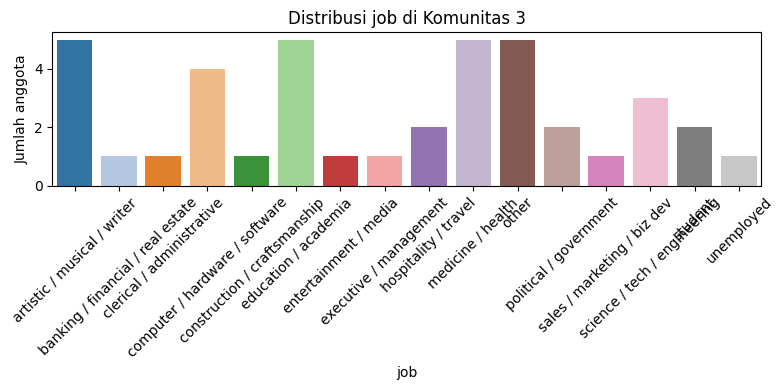

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


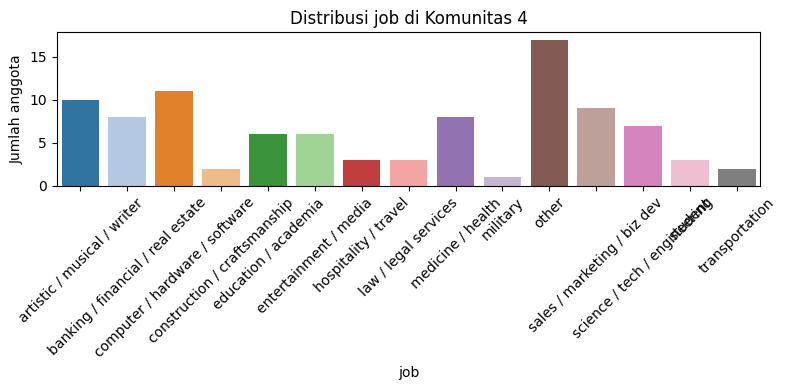

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


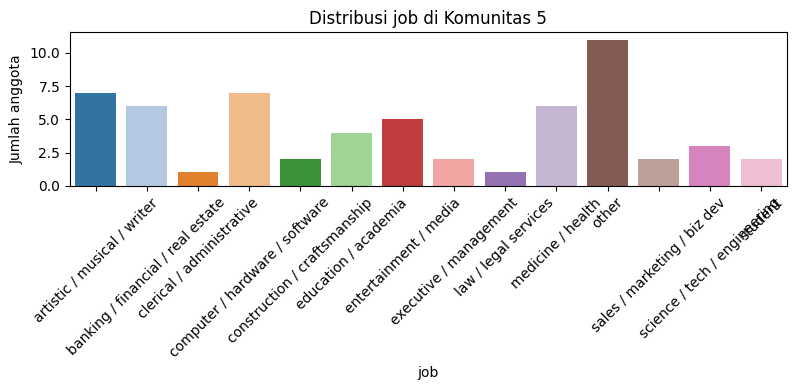

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


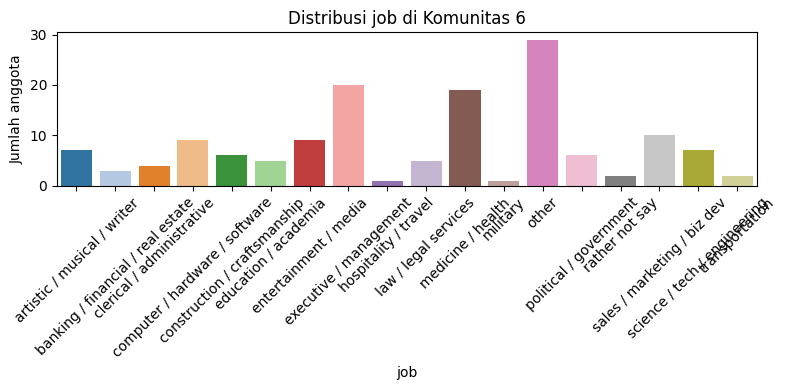

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


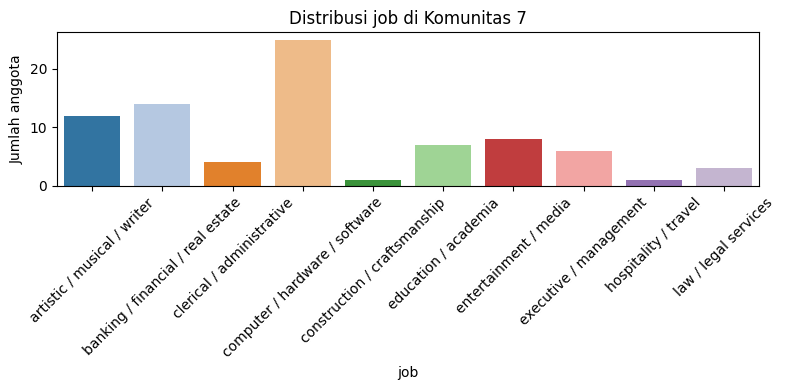

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


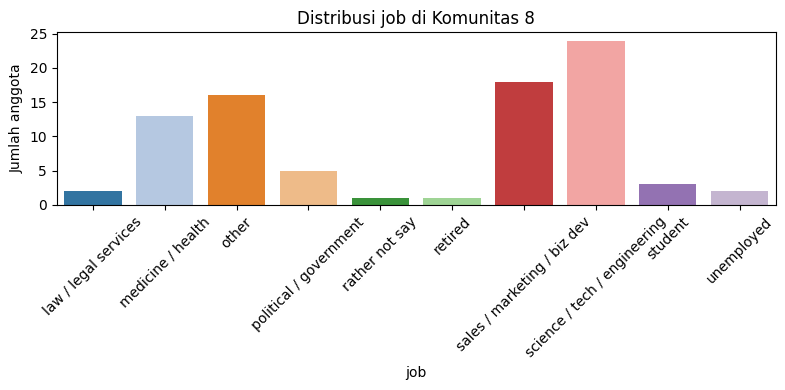

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


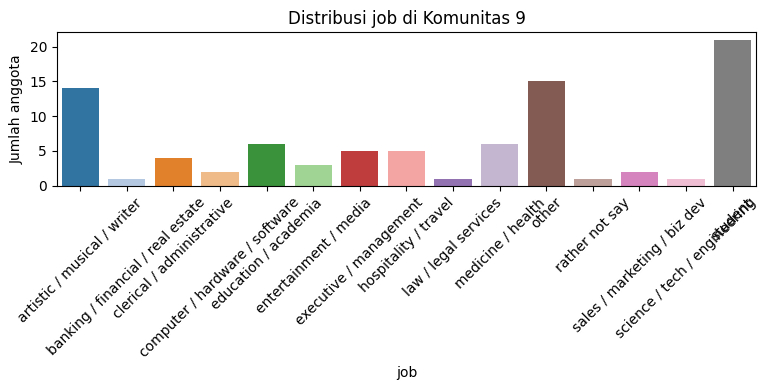

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


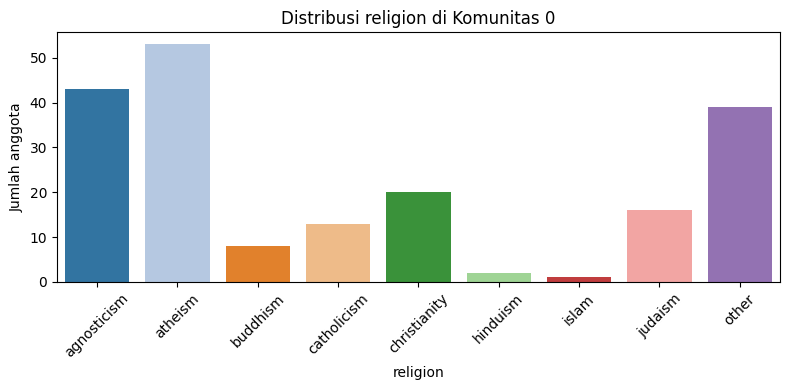

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


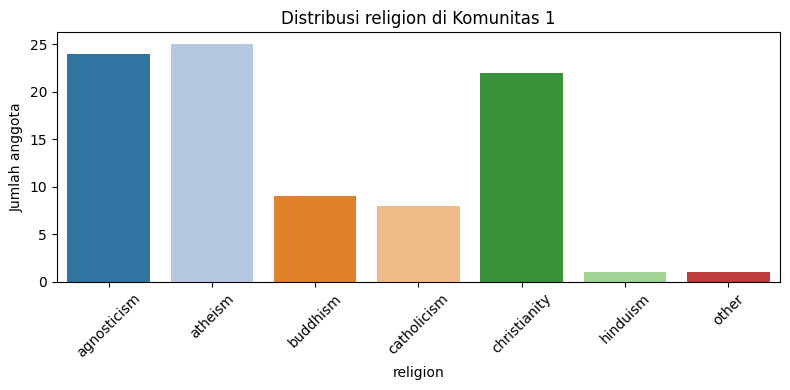

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


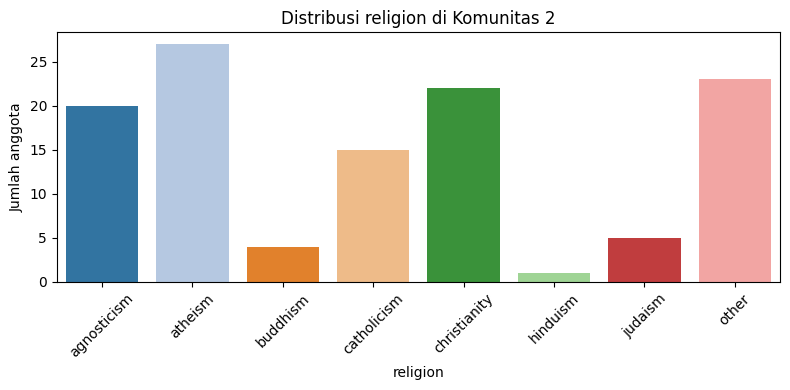

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


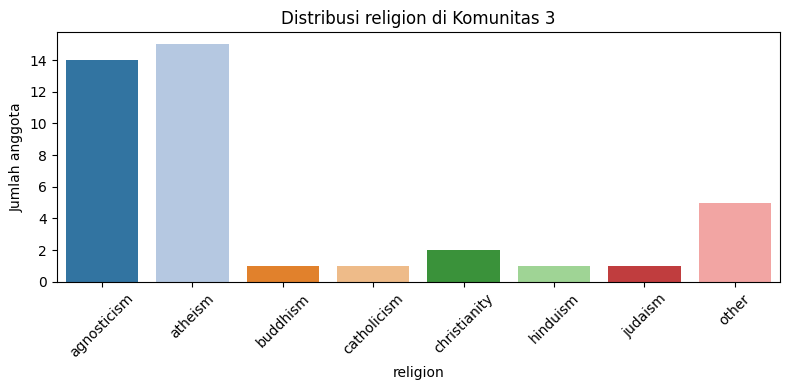

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


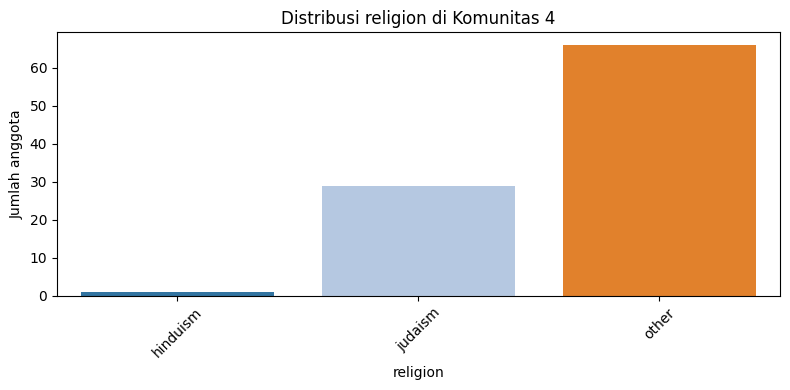

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


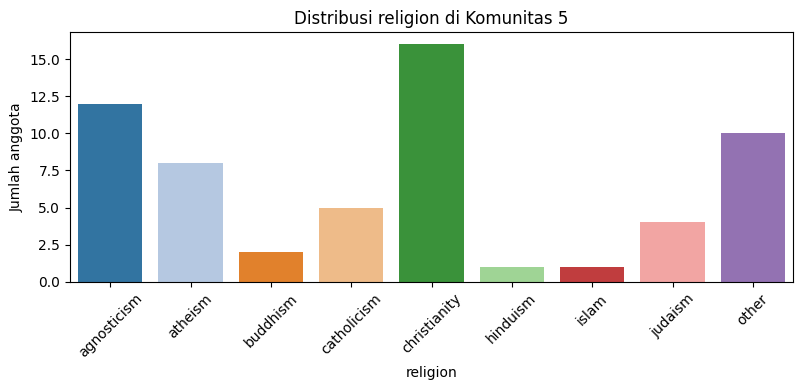

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


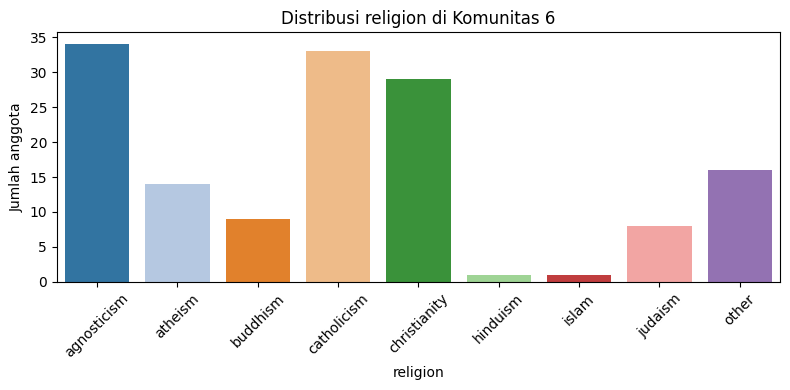

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


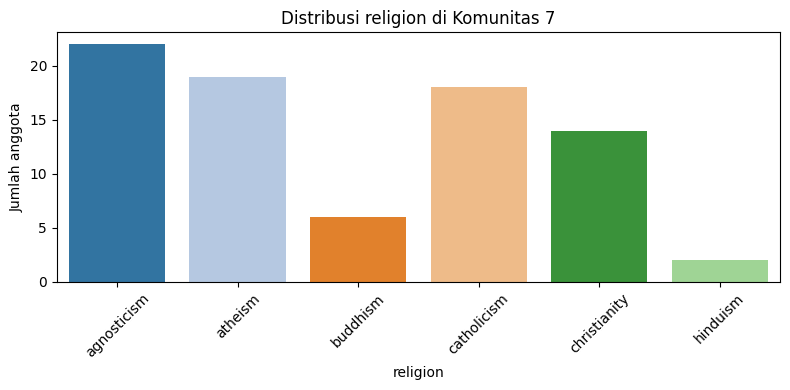

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


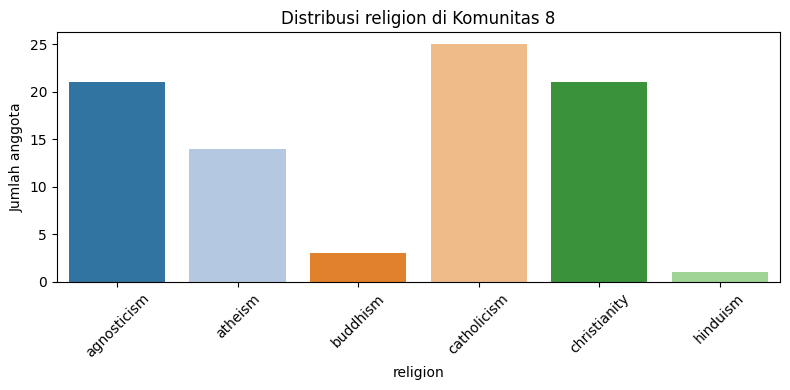

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


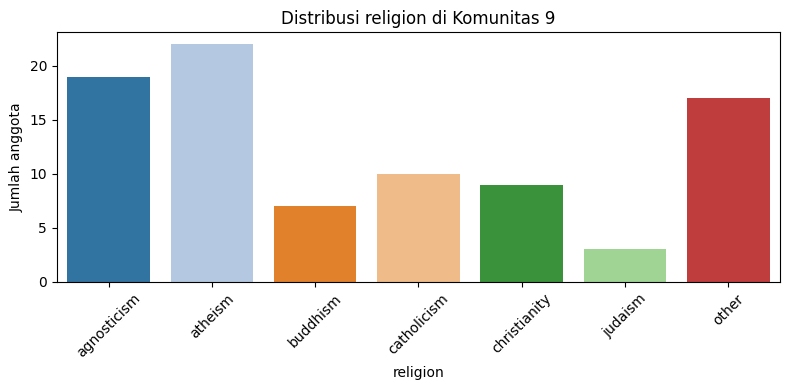

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


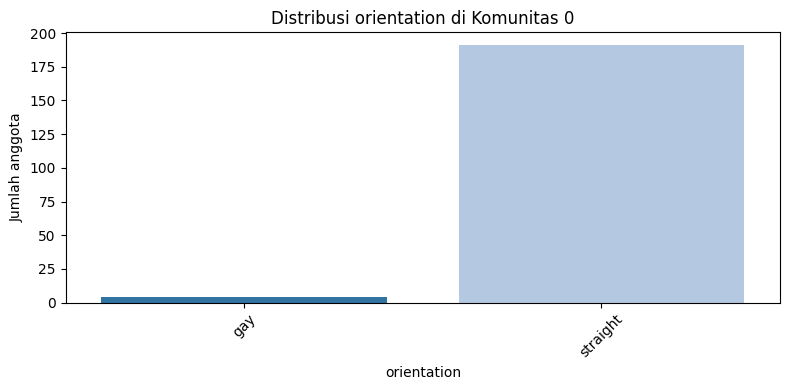

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


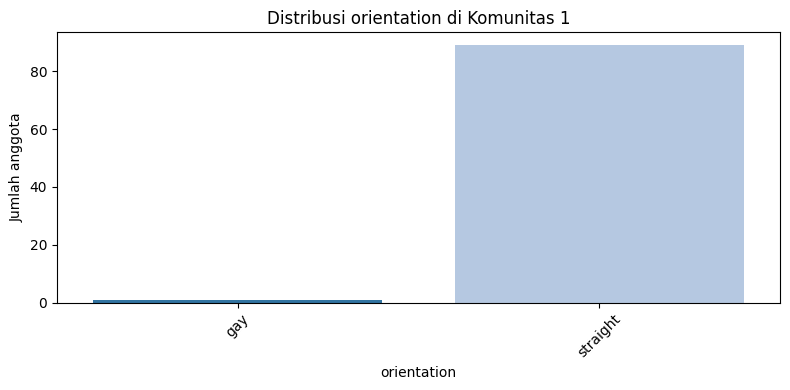

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


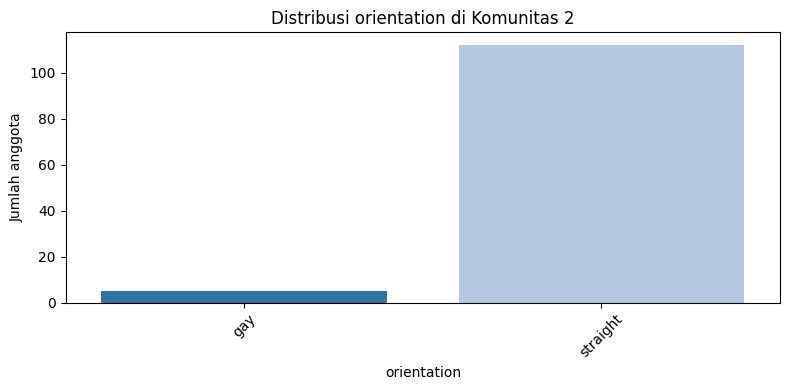

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


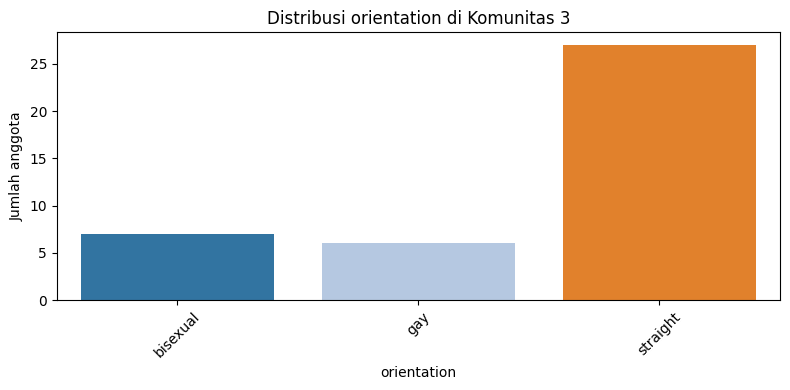

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


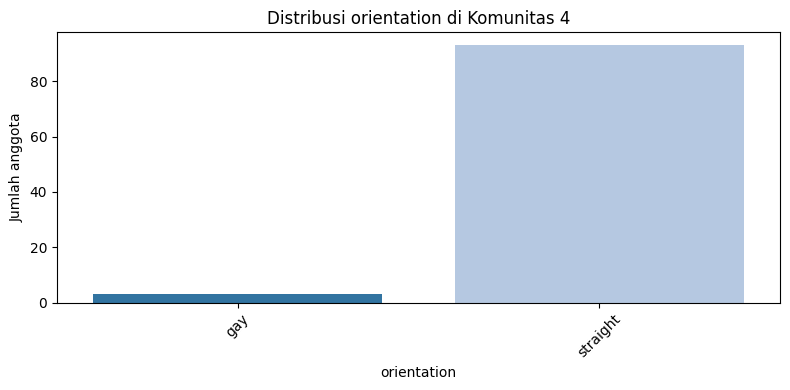

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


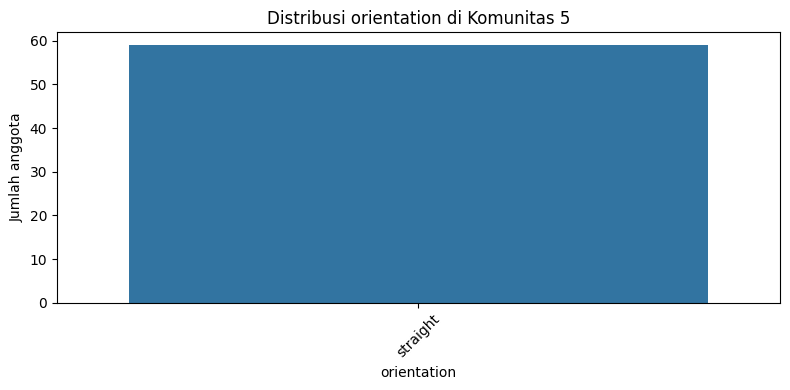

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


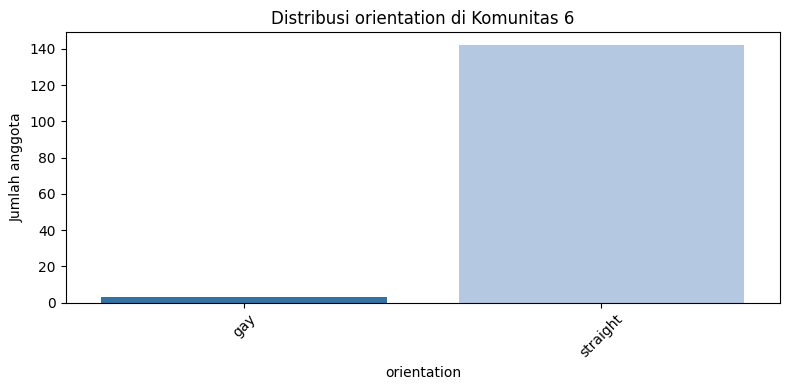

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


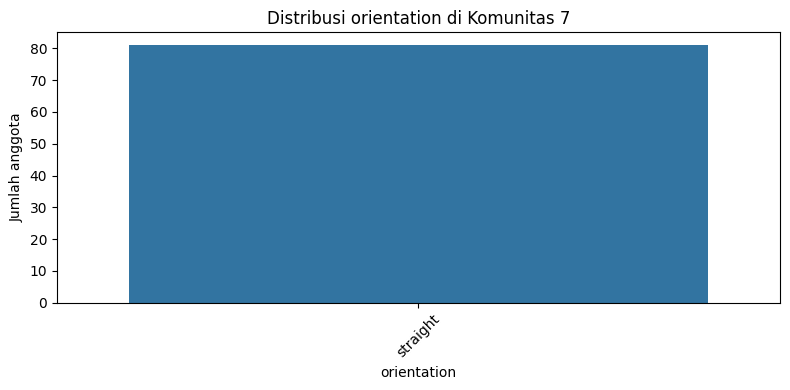

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


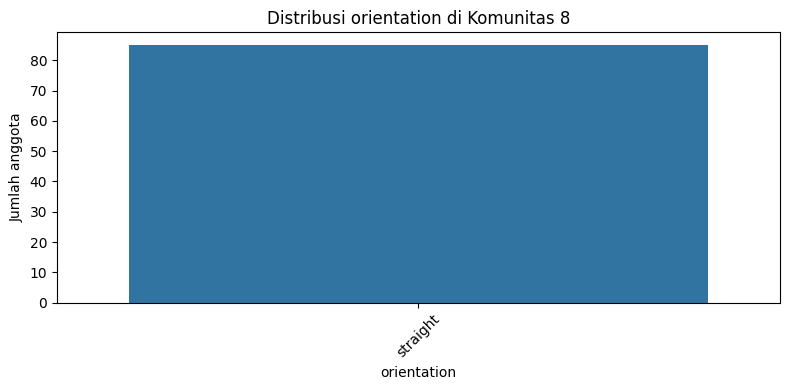

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


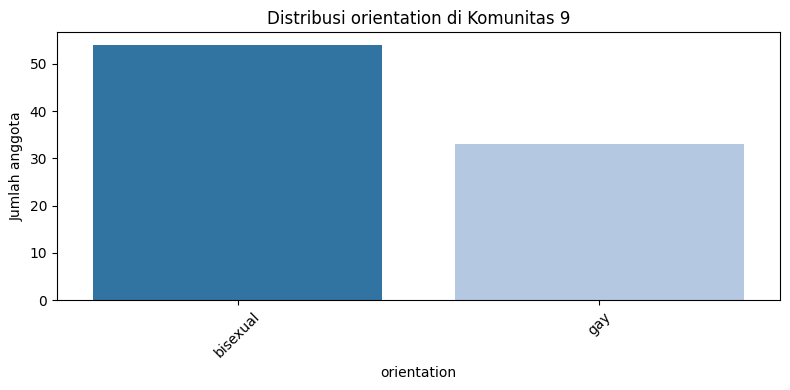

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


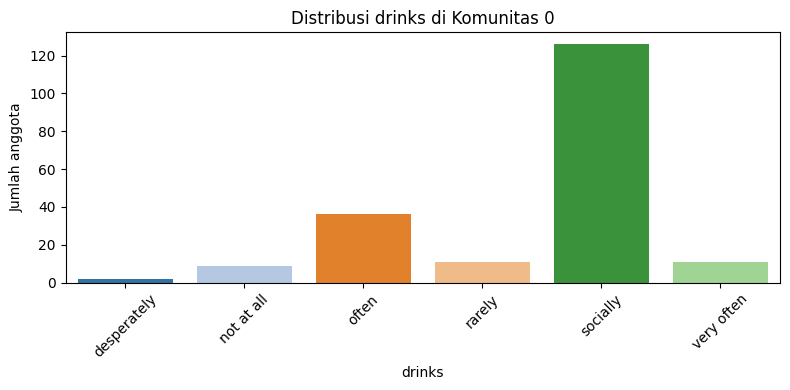

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


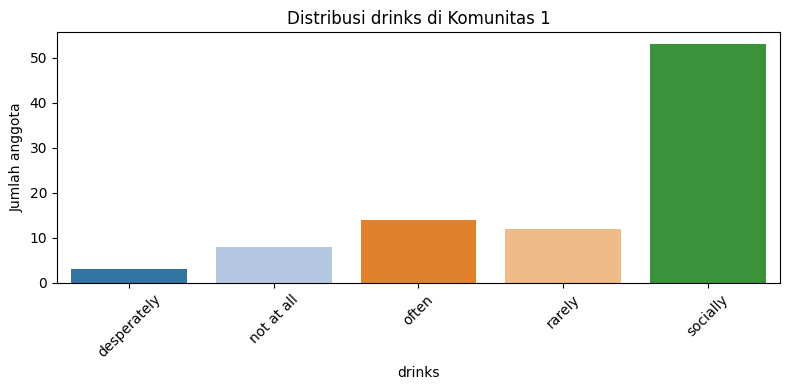

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


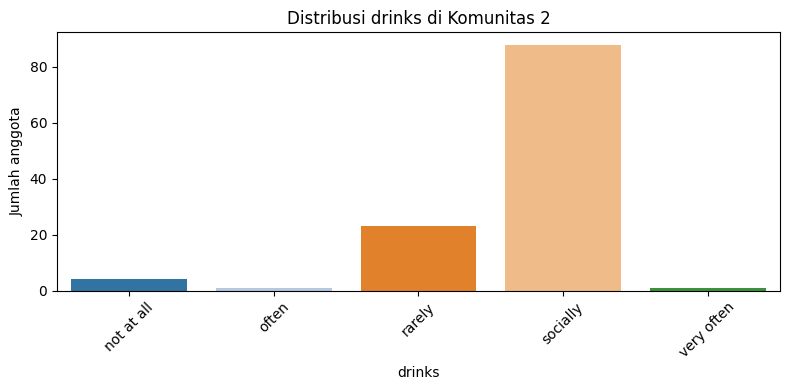

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


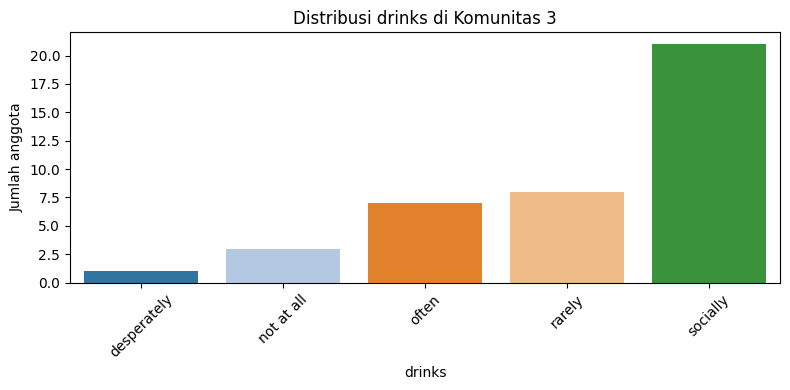

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


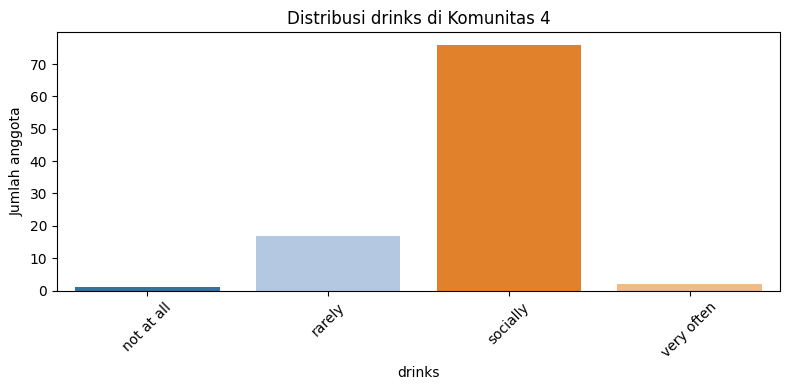

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


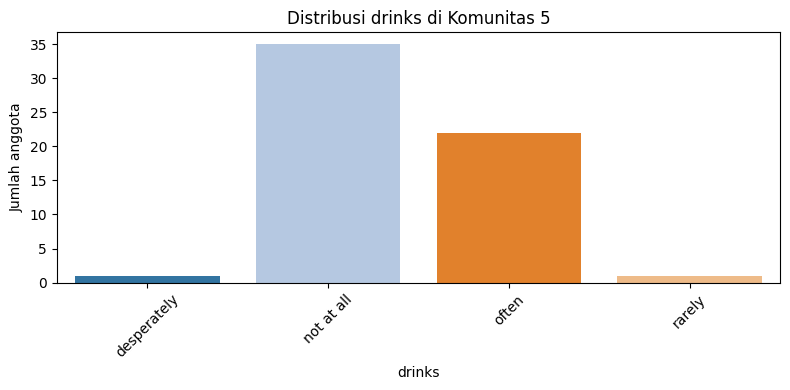

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


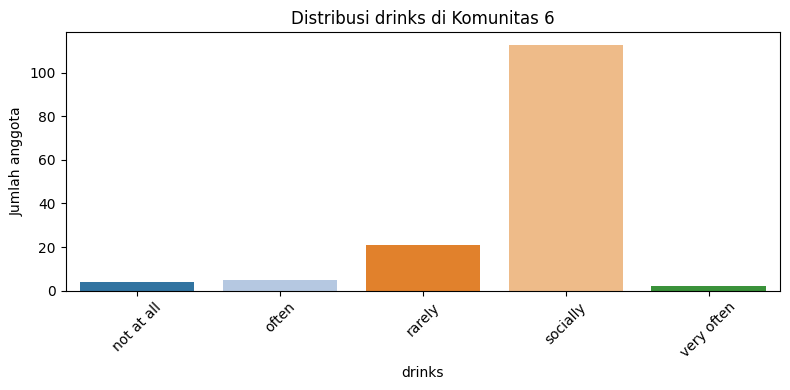

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


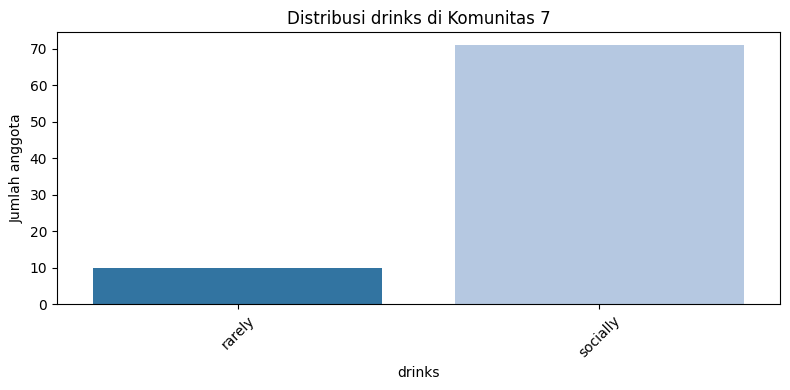

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


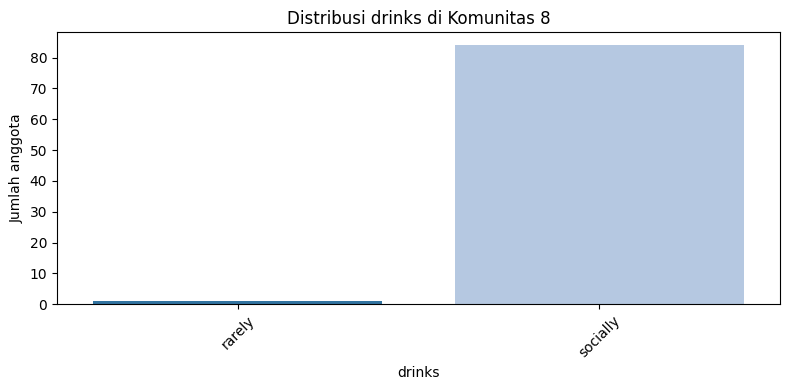

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


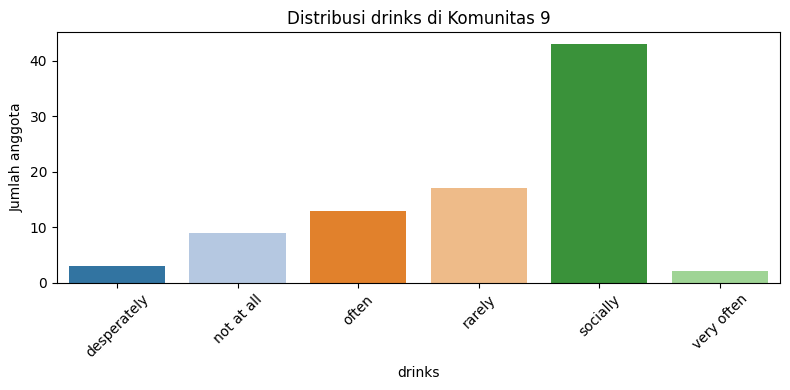

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


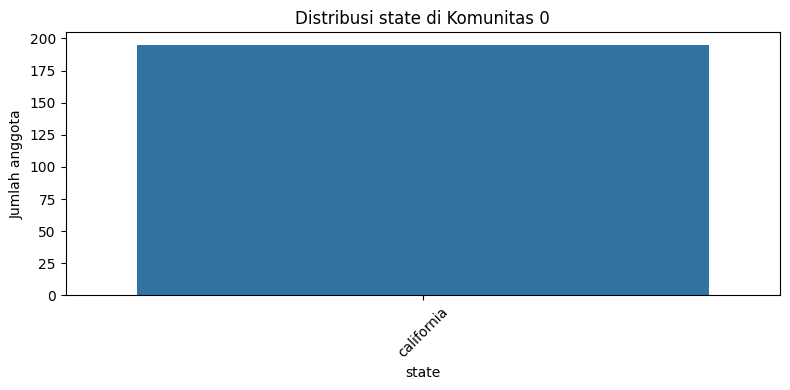

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


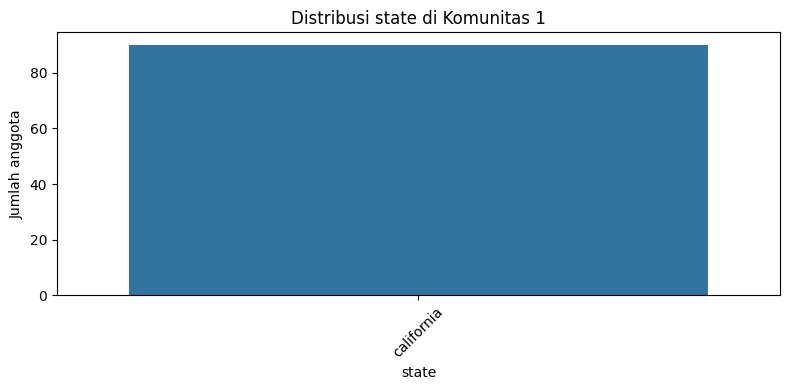

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


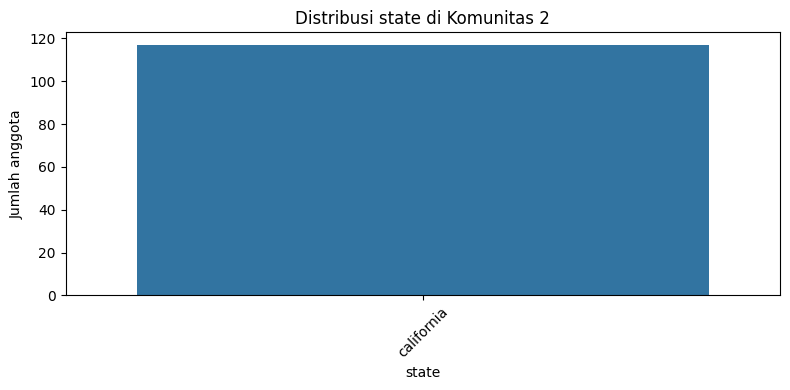

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


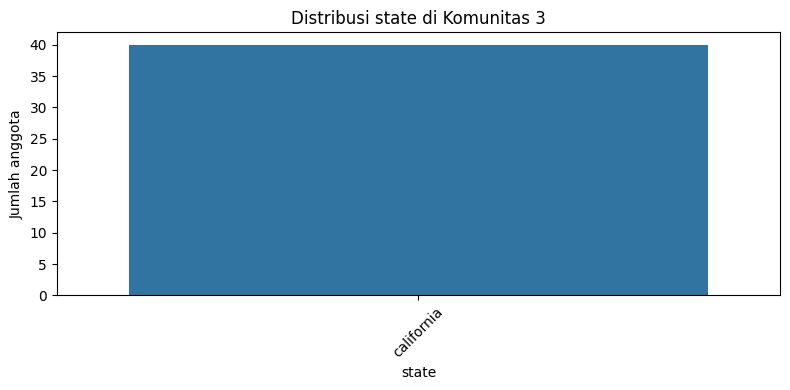

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


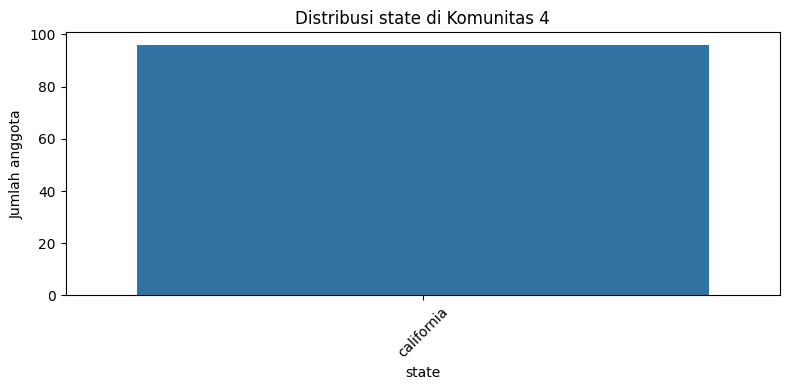

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


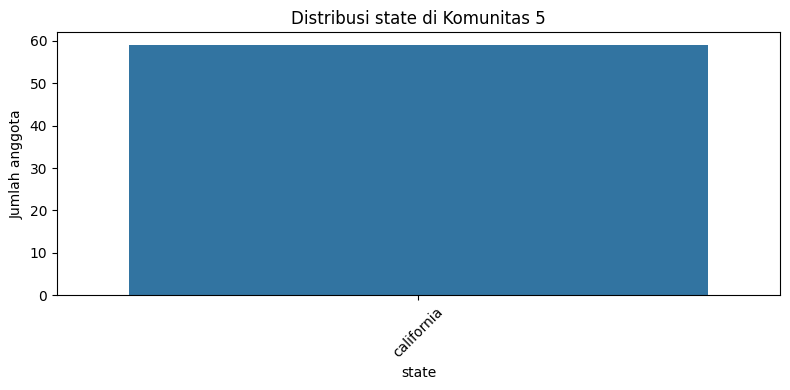

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


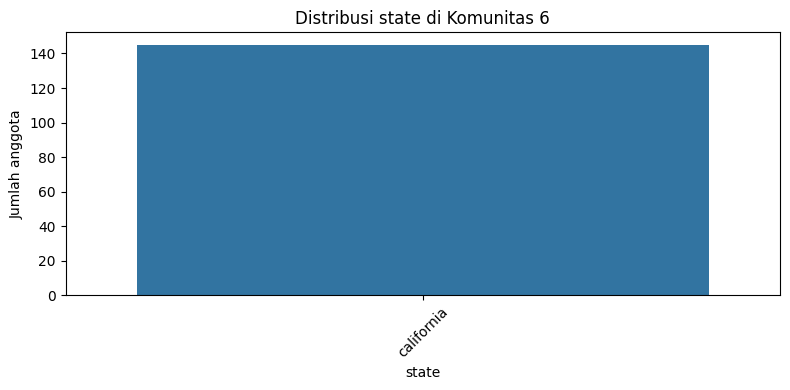

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


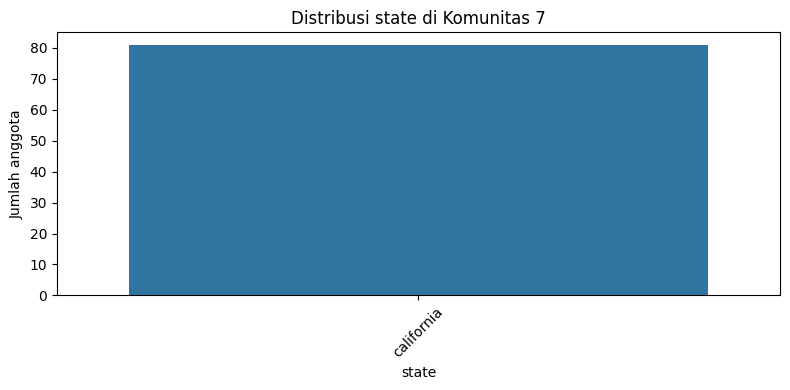

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


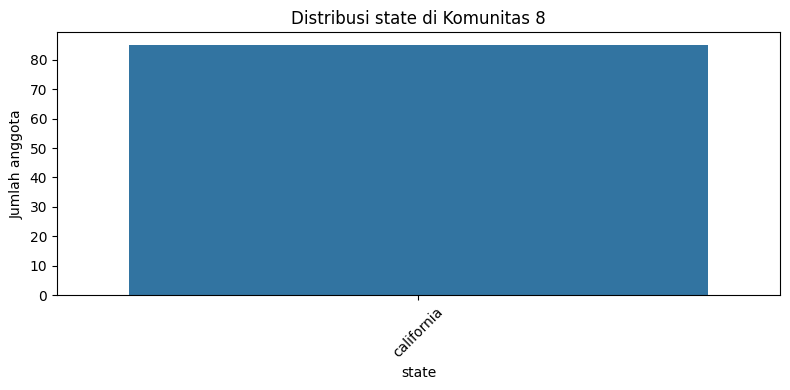

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


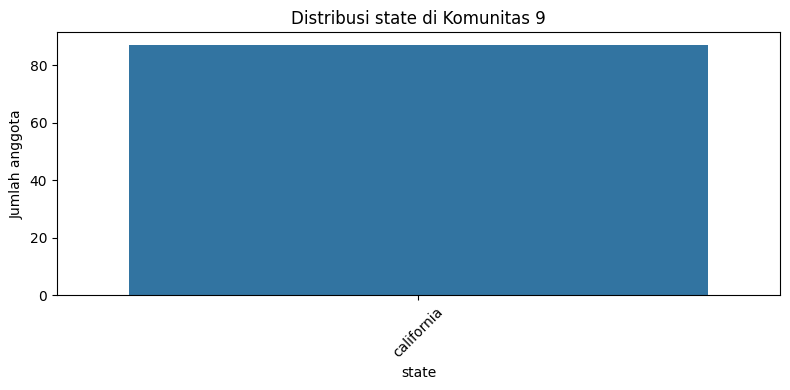

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


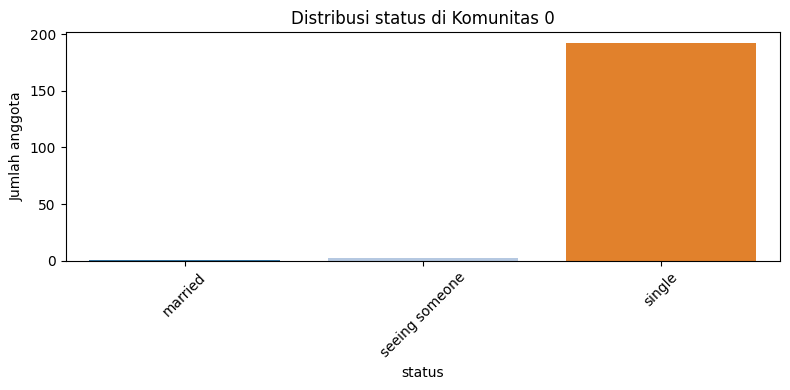

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


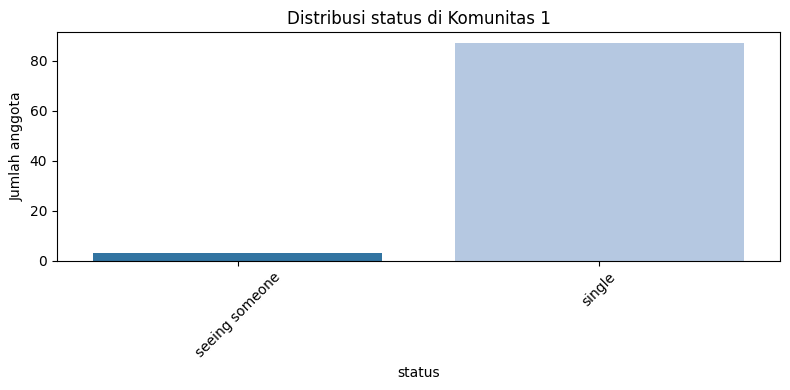

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


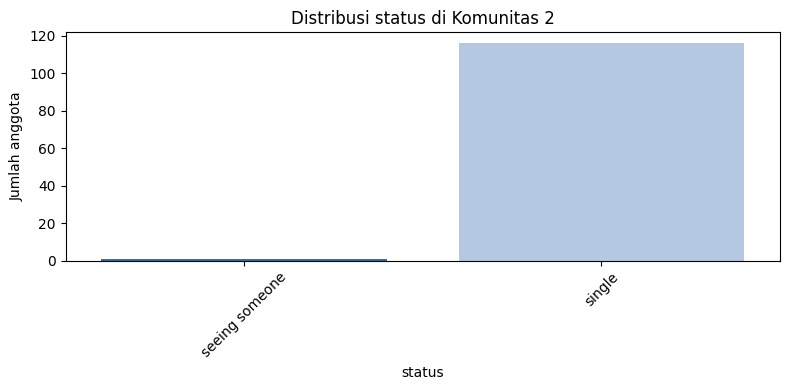

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


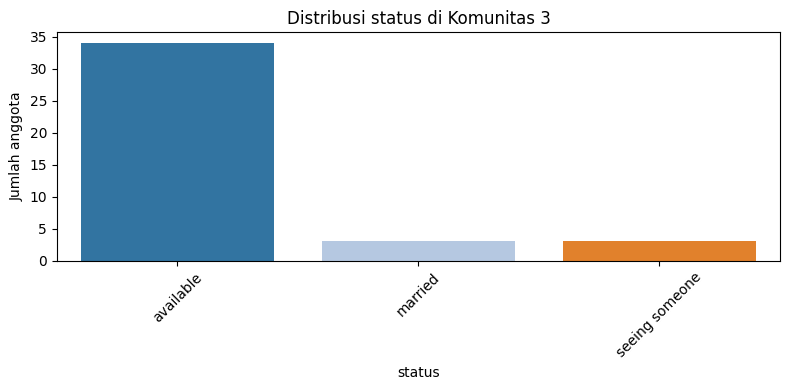

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


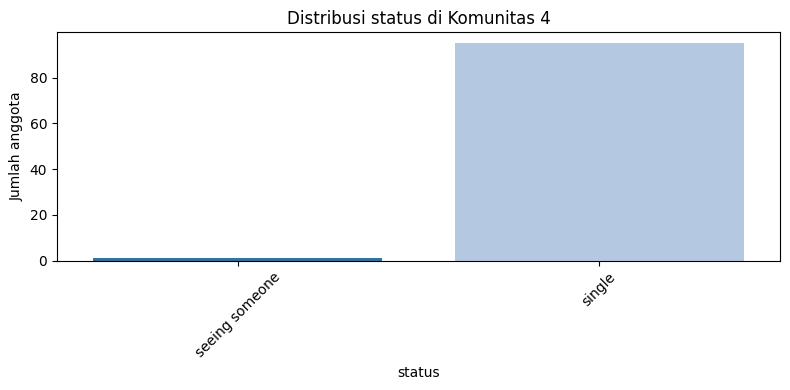

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


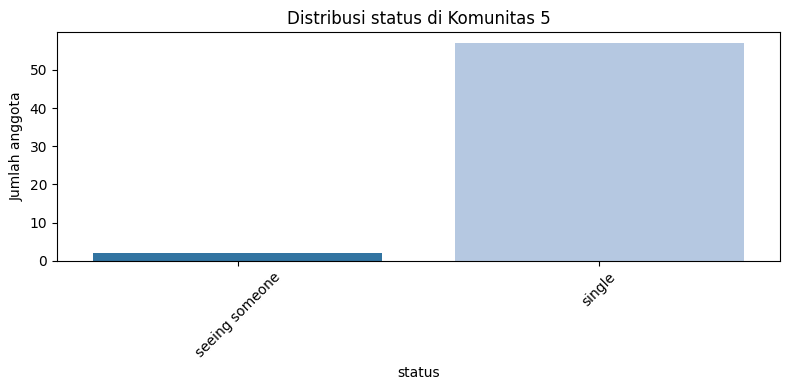

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


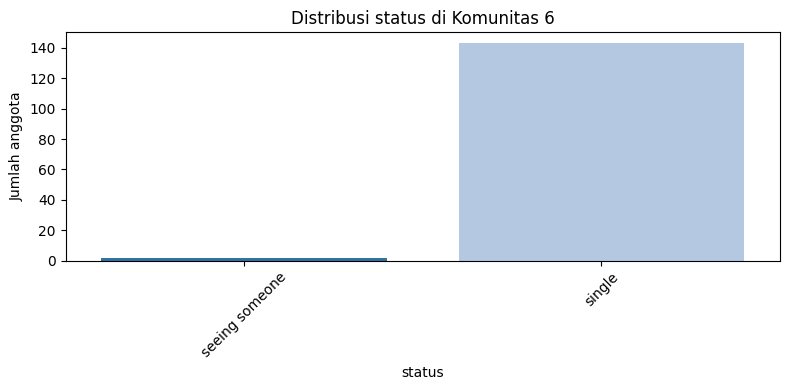

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


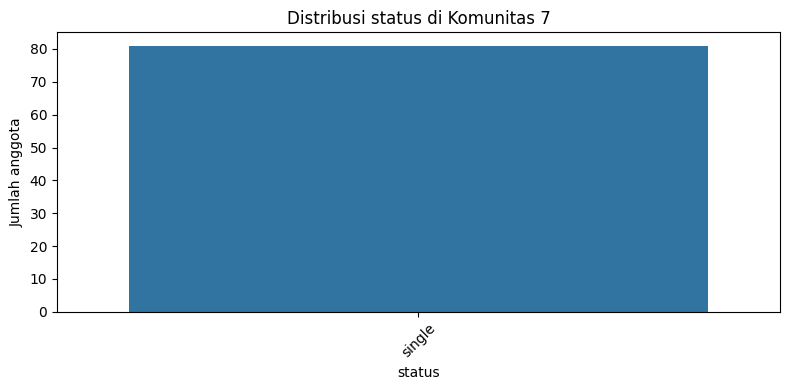

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


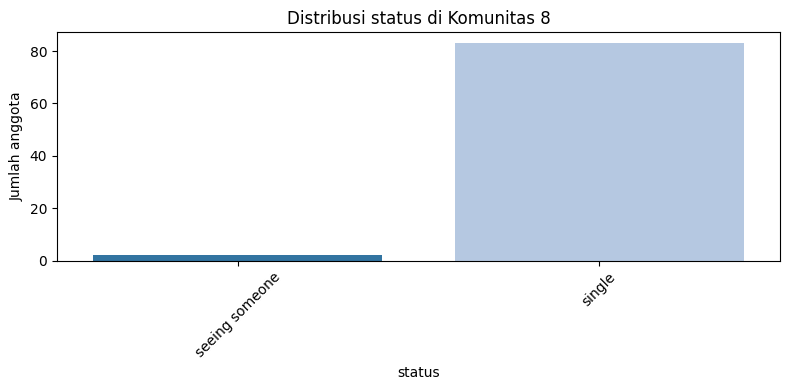

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


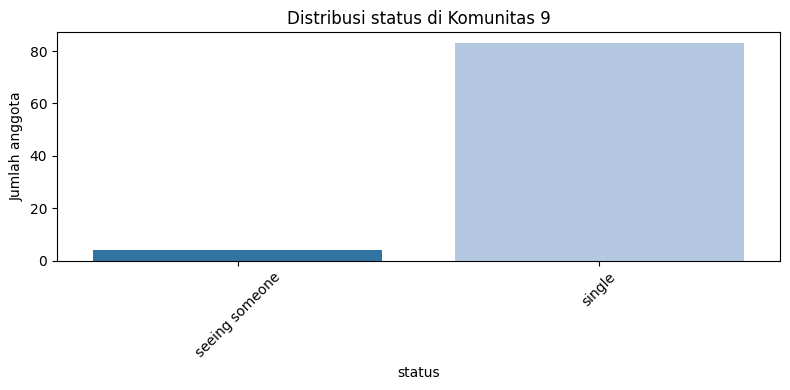

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


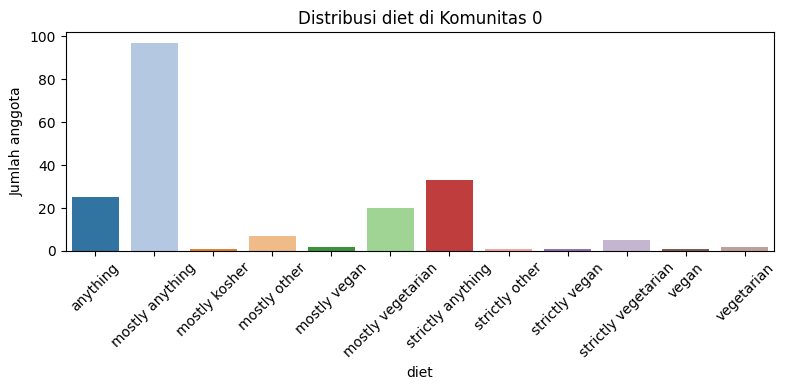

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


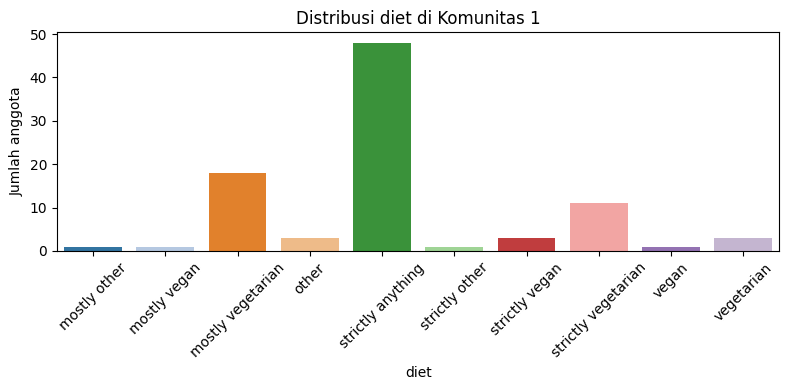

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


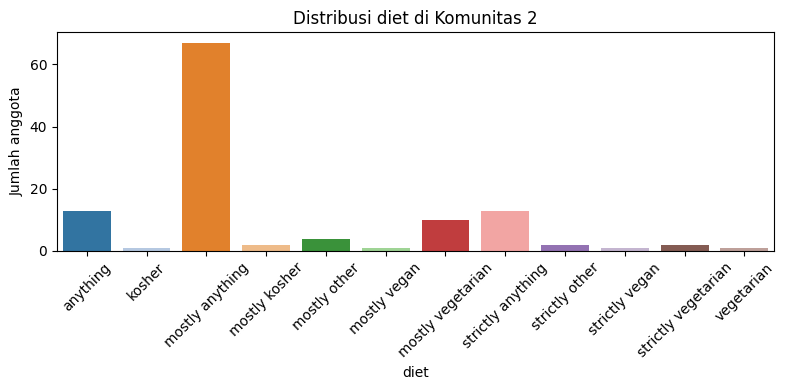

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


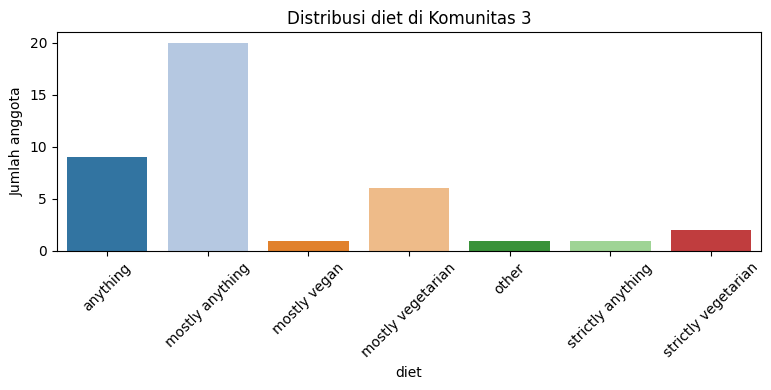

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


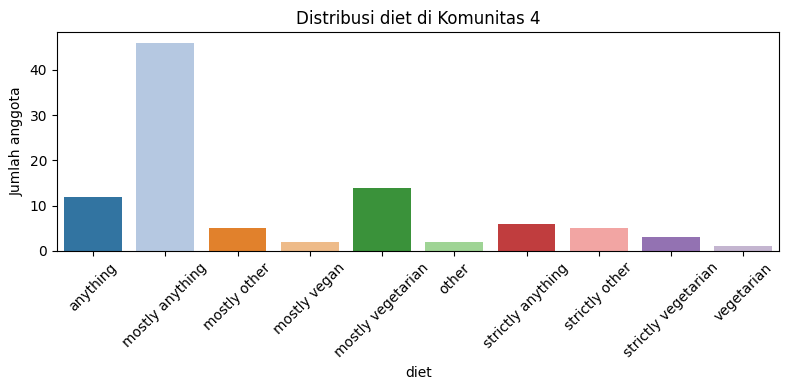

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


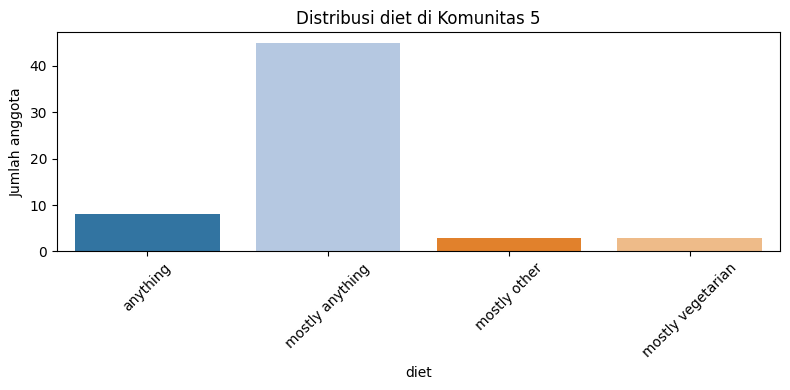

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


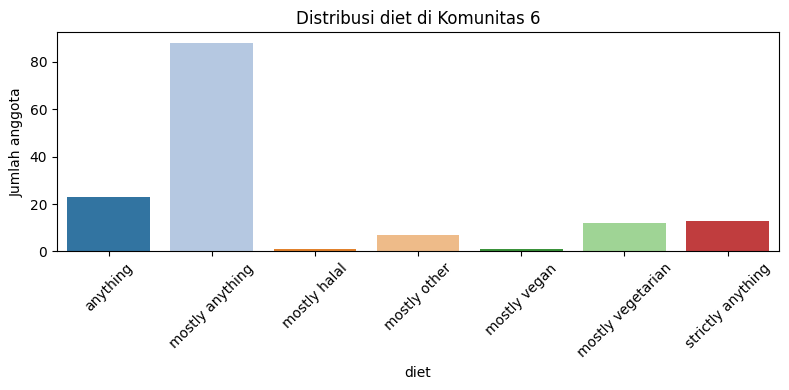

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


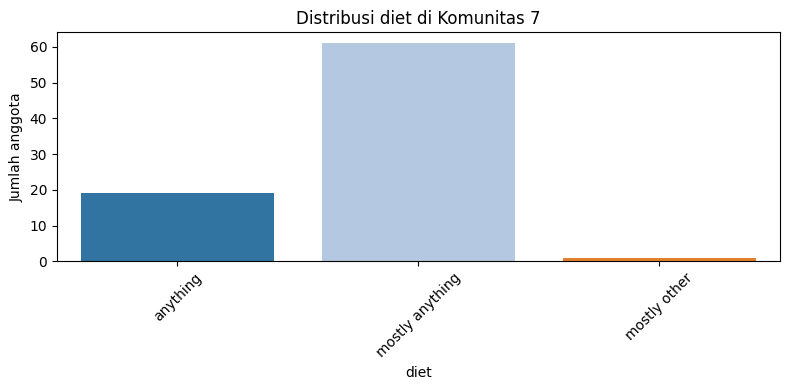

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


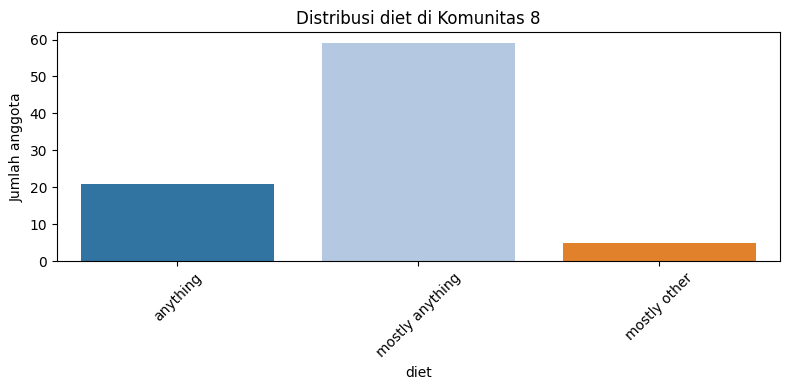

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


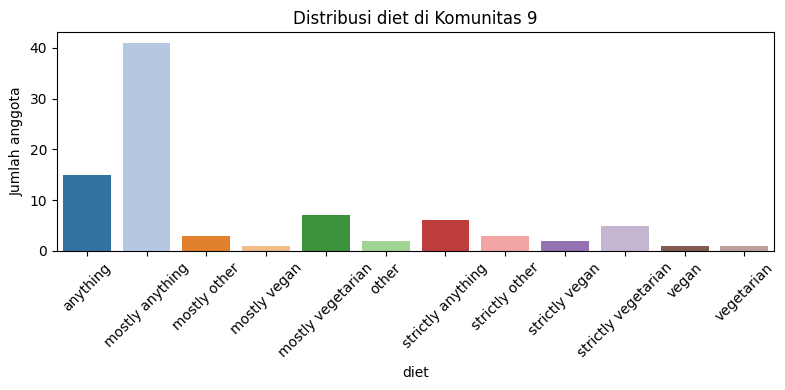

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


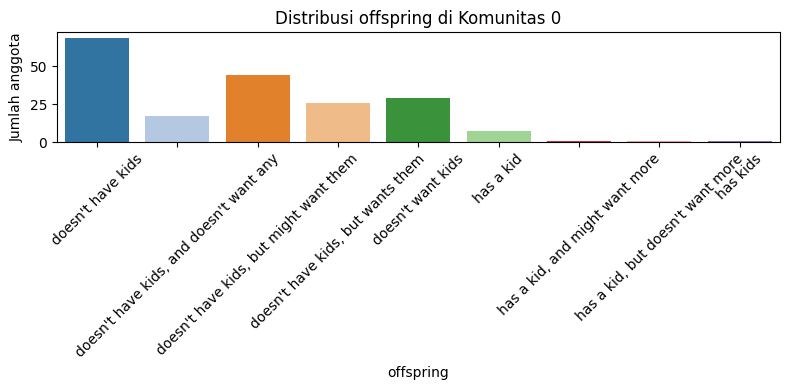

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


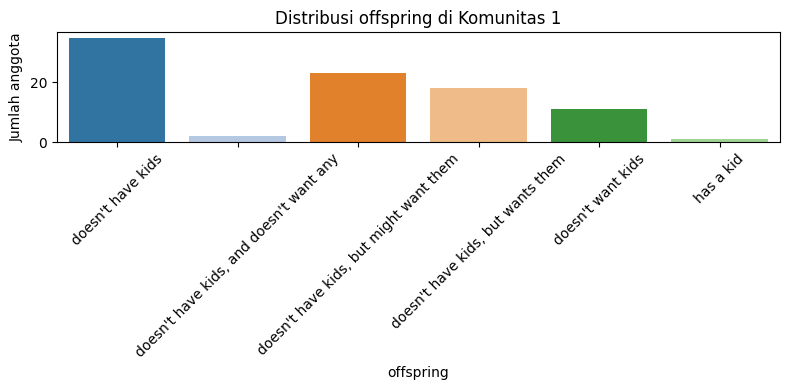

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


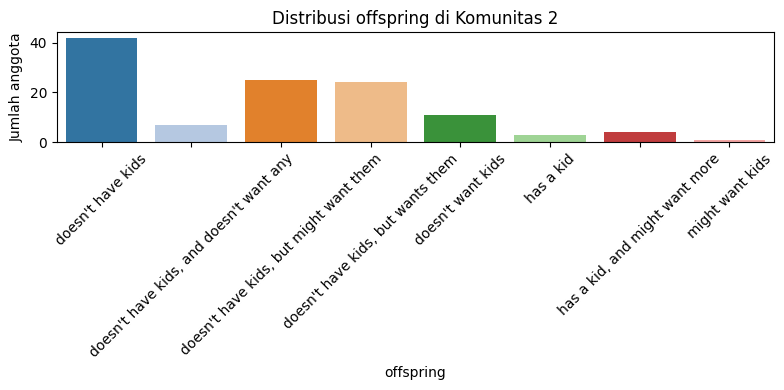

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


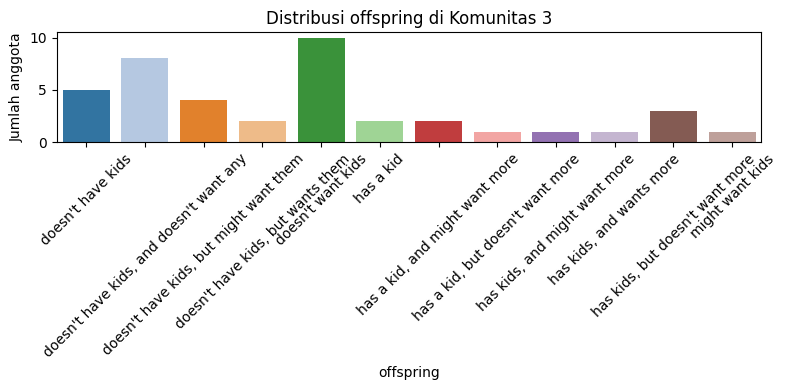

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


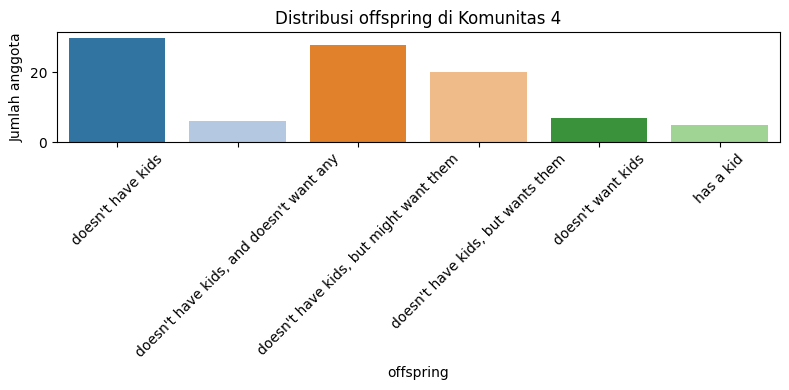

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


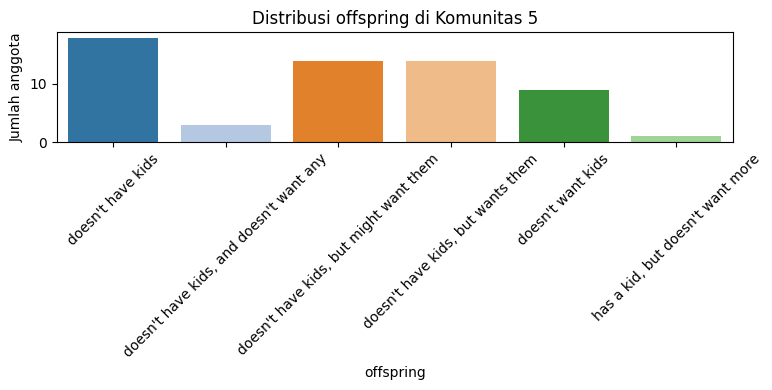

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


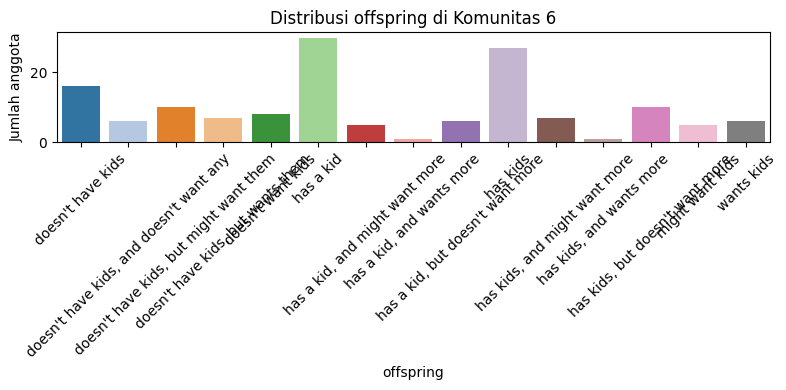

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


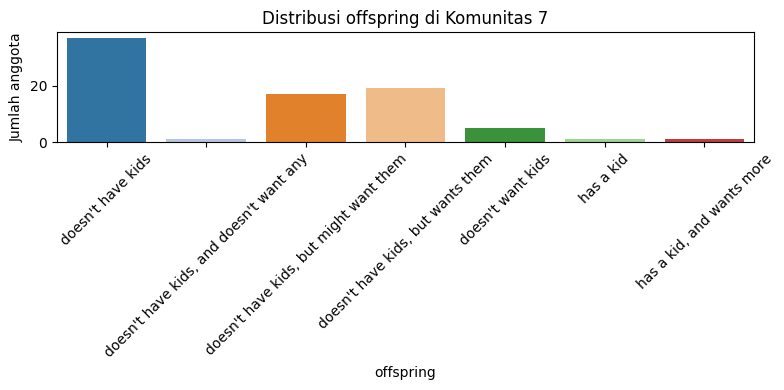

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


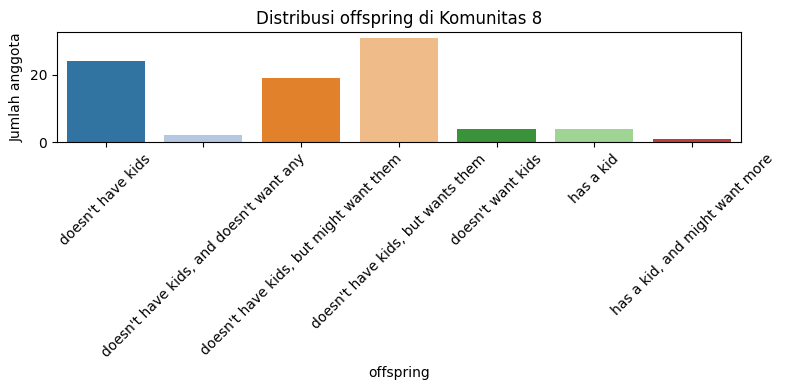

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


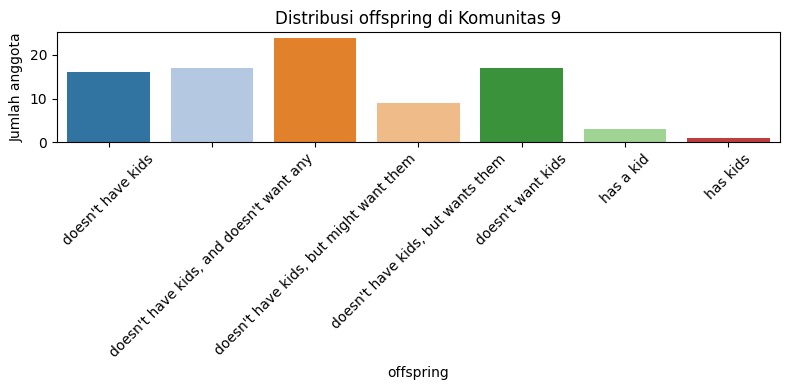

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


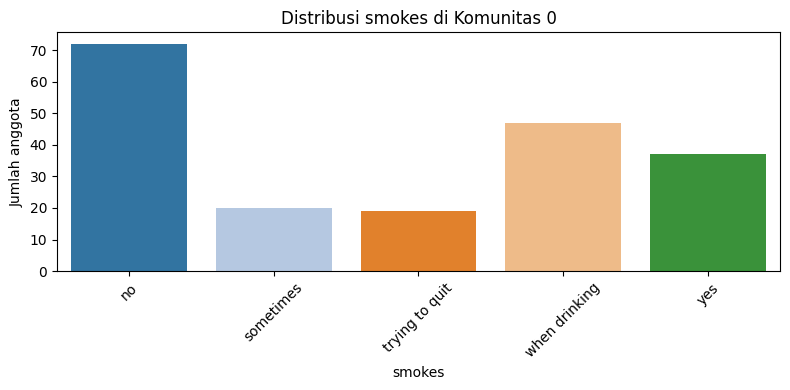

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


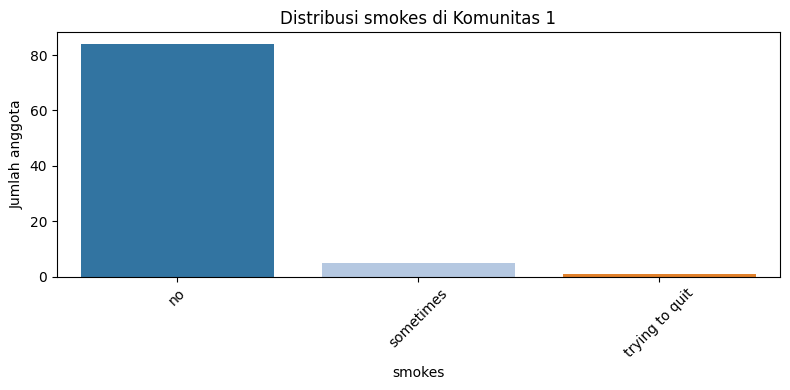

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


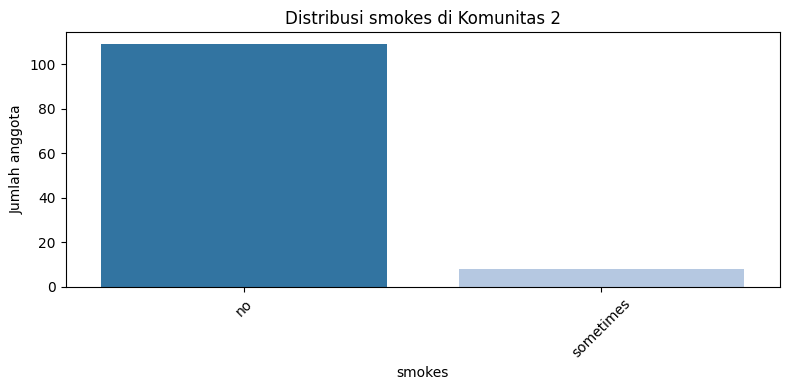

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


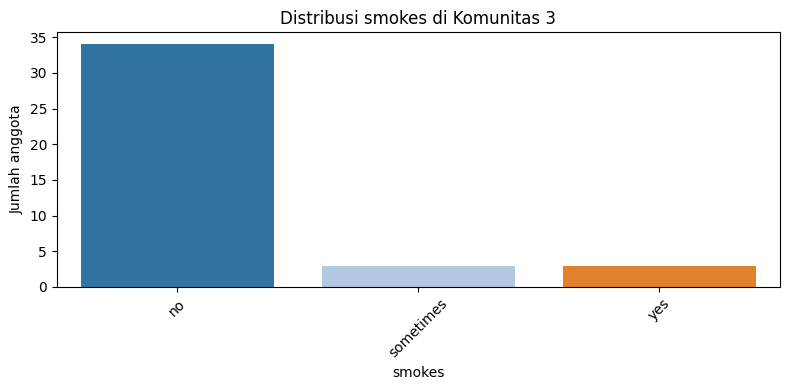

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


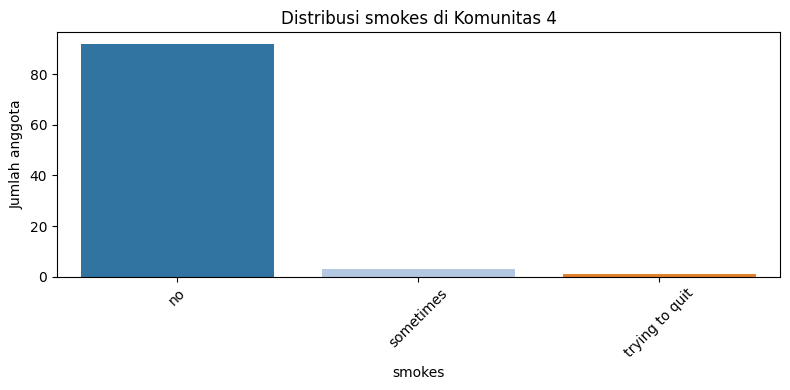

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


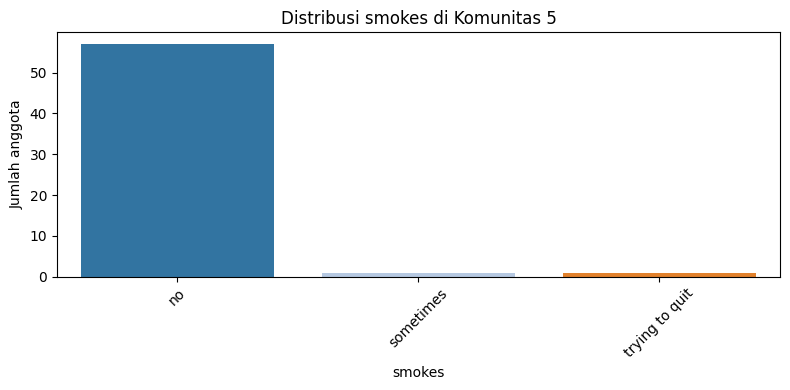

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


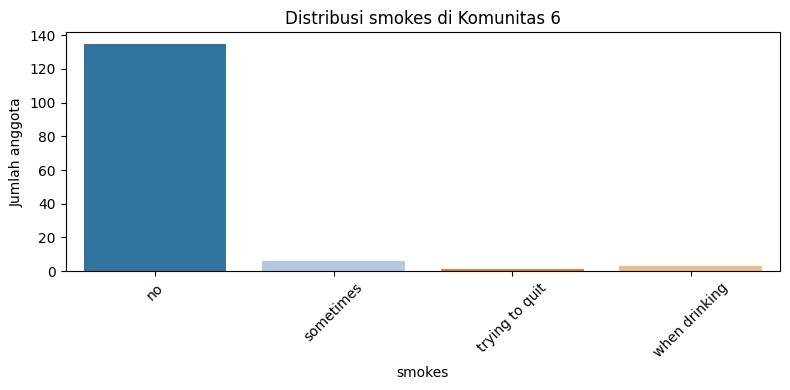

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


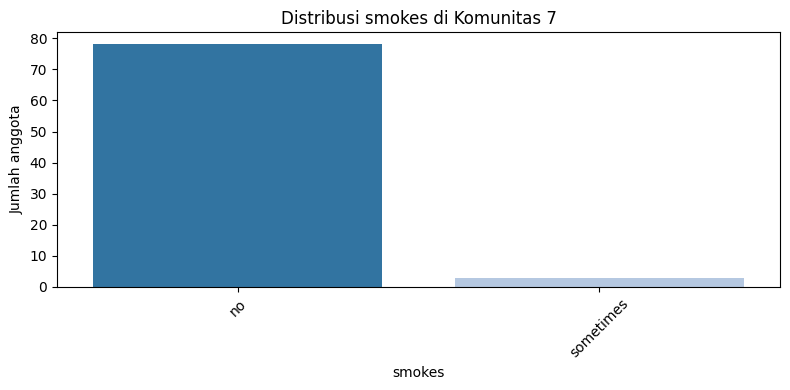

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


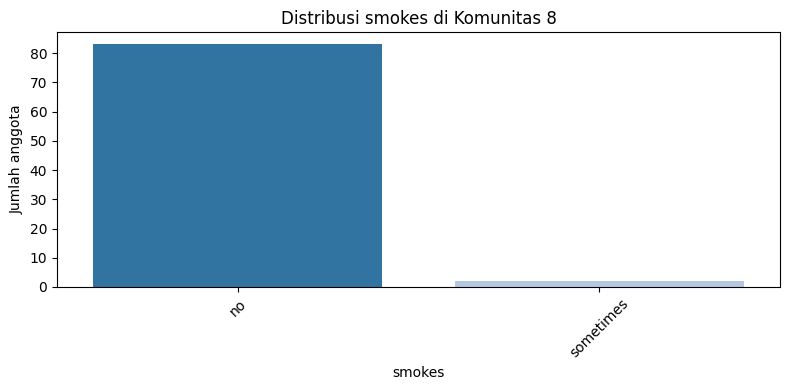

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


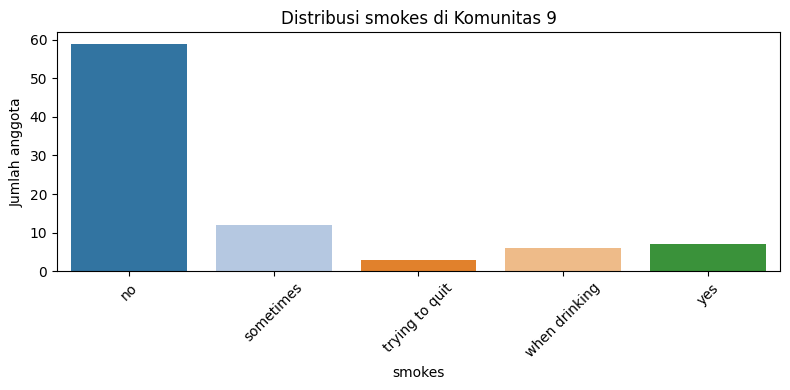

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


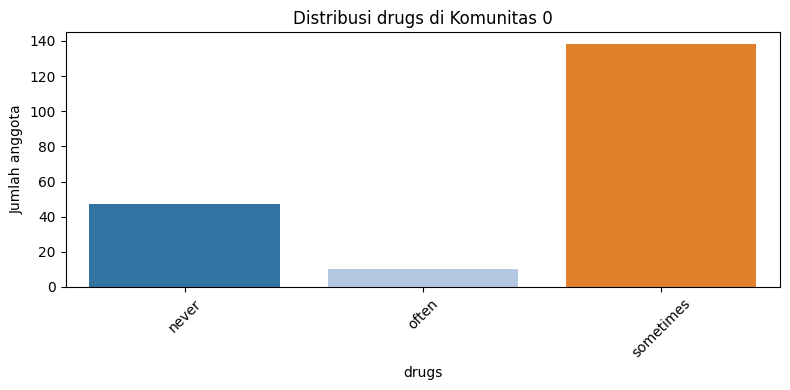

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


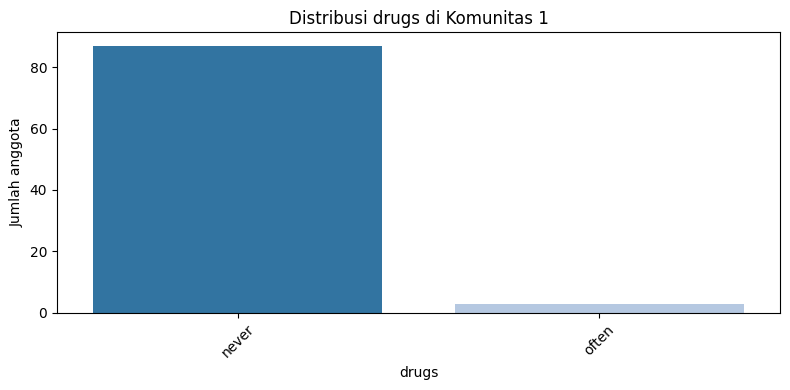

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


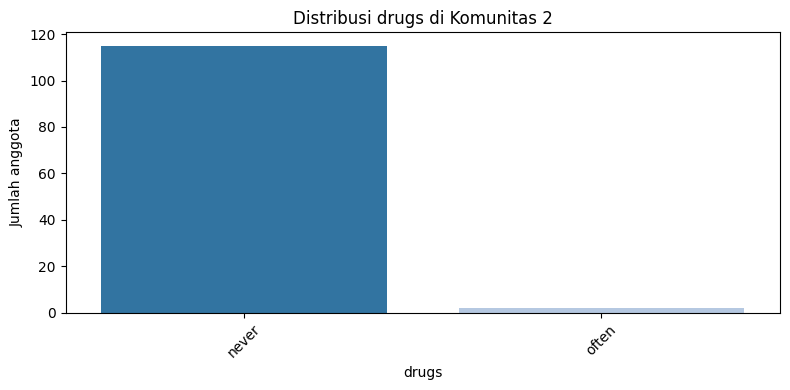

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


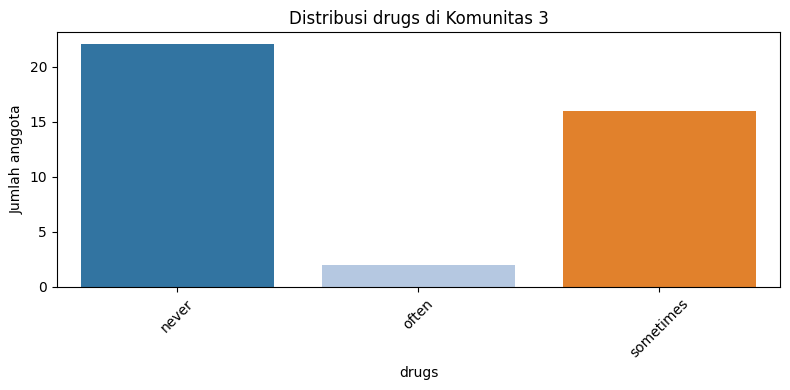

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


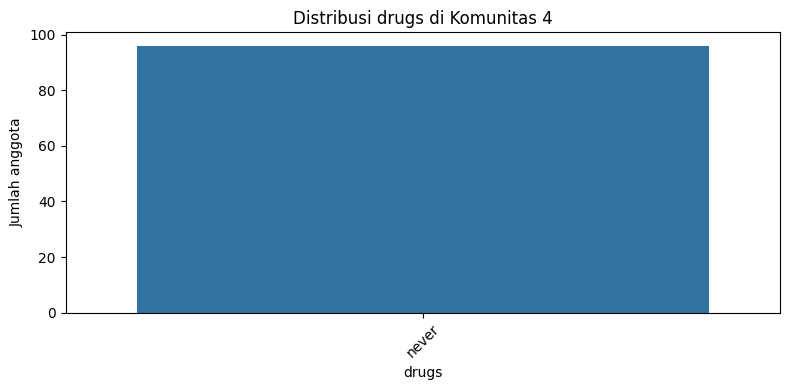

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


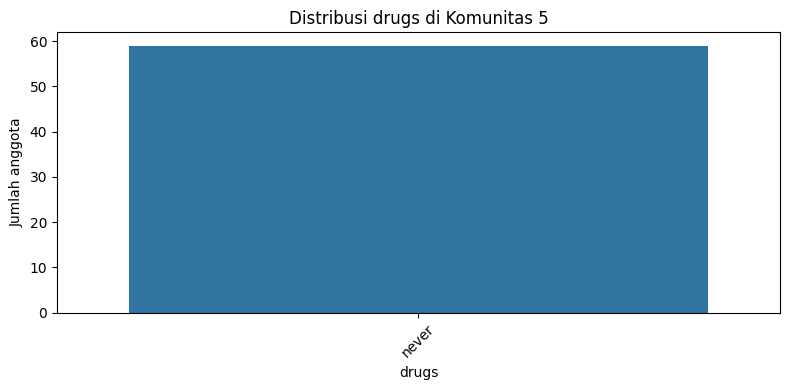

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


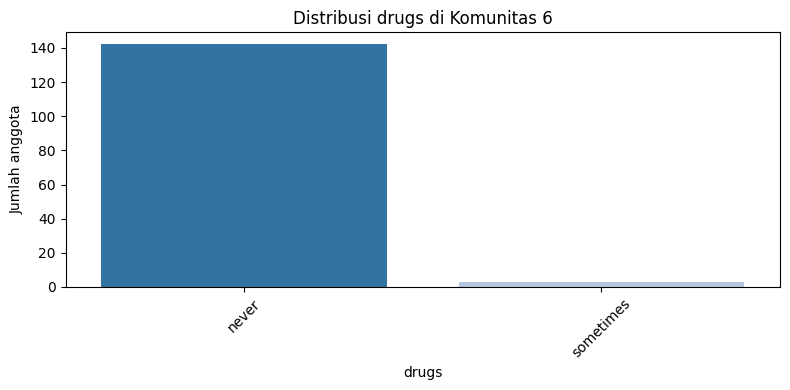

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


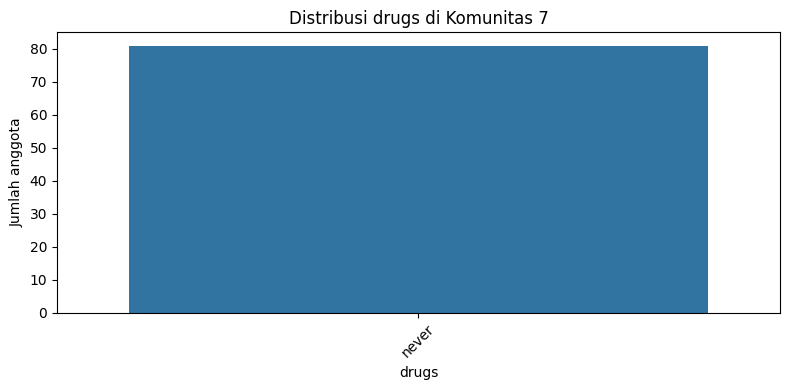

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


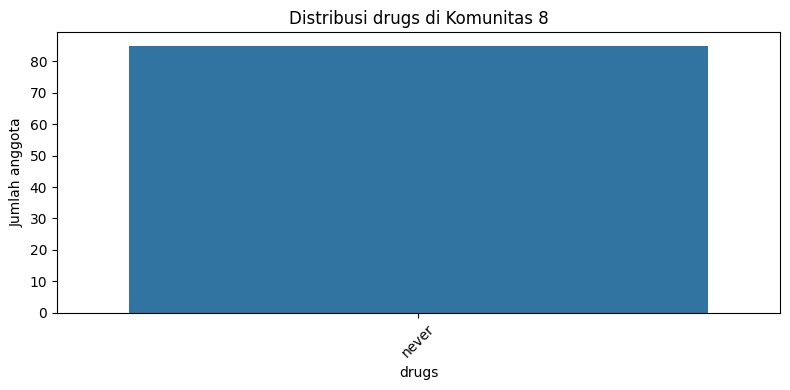

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


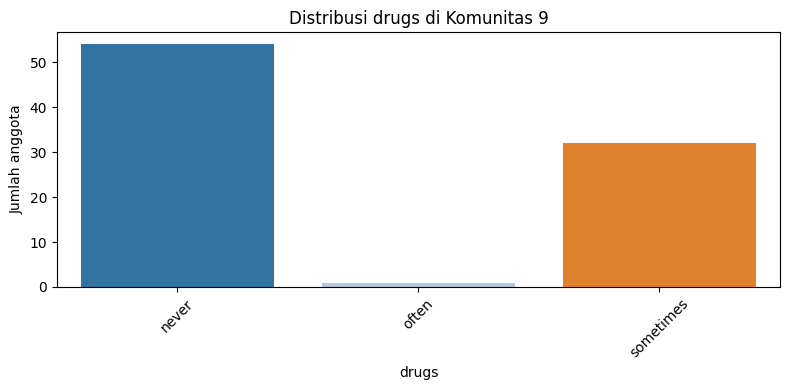

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


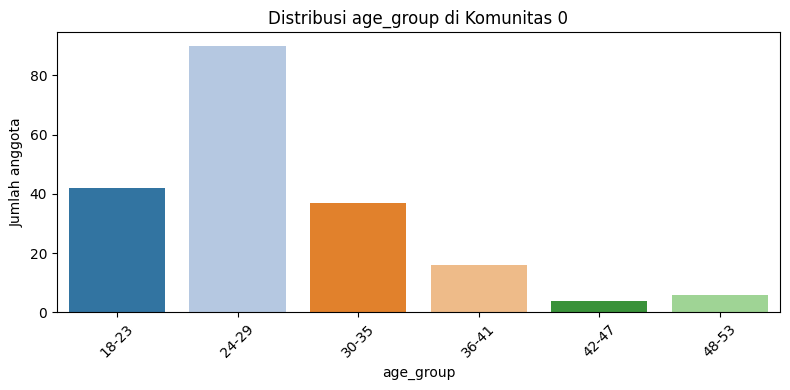

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


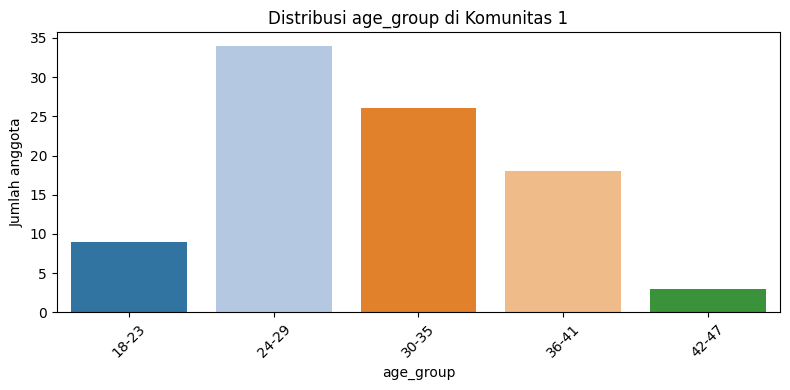

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


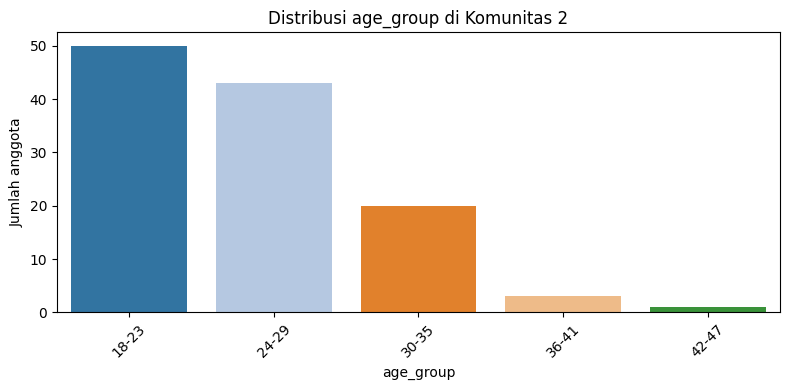

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


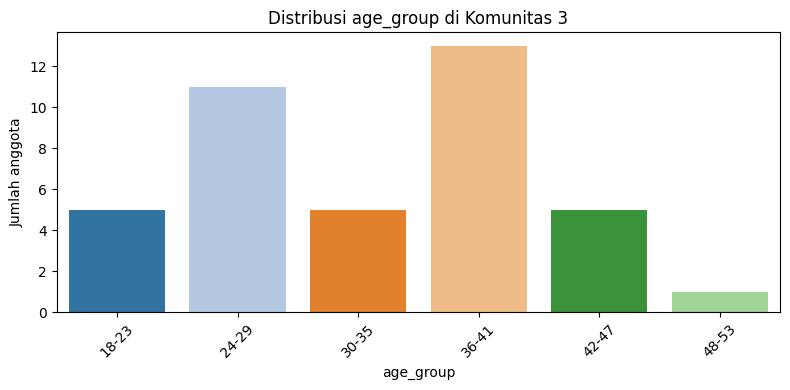

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


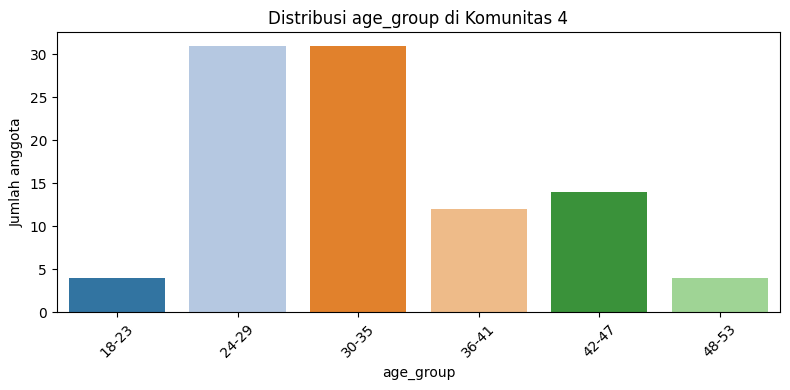

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


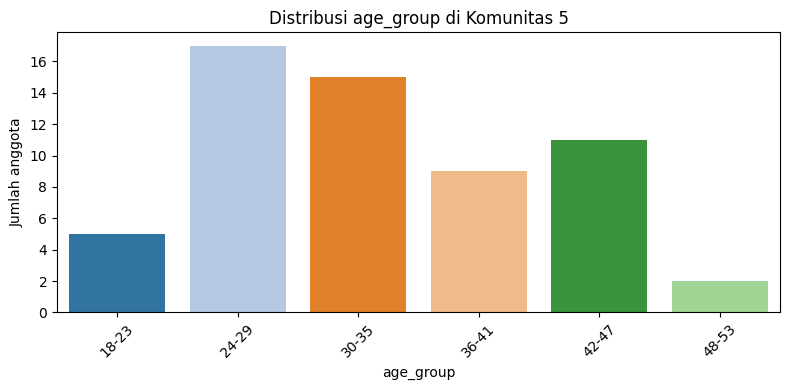

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


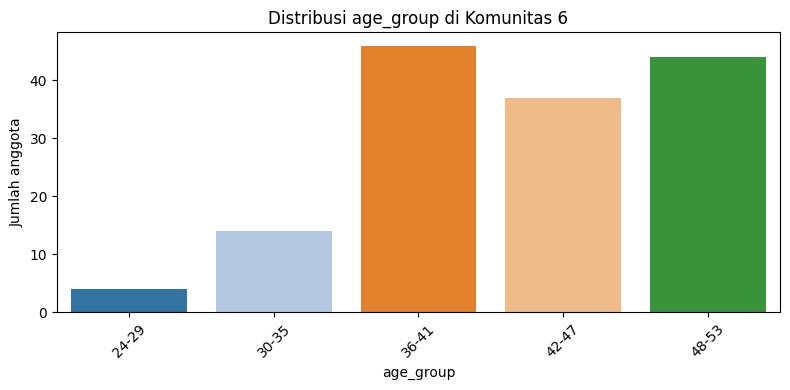

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


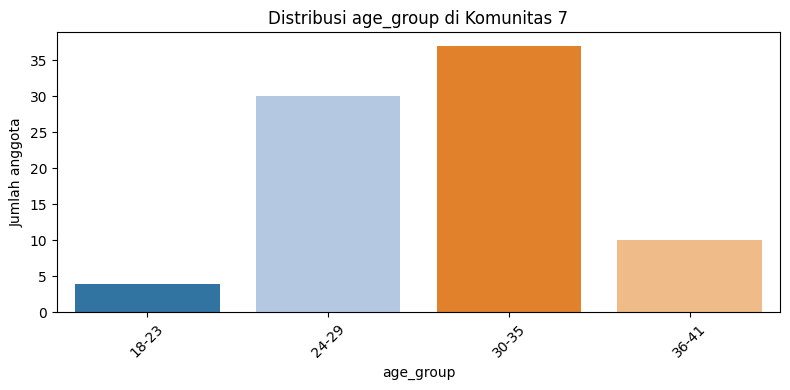

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


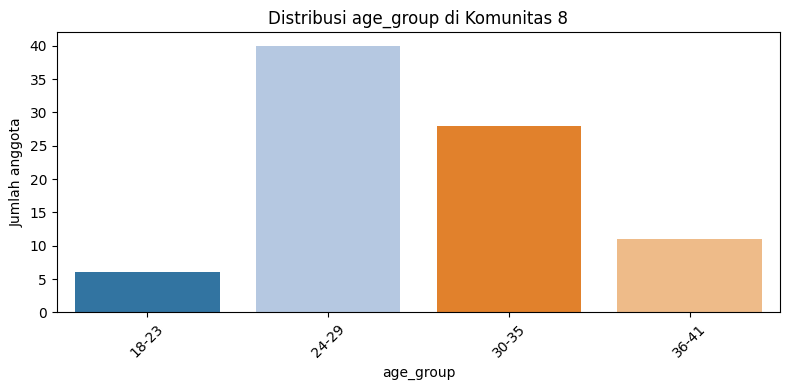

C:\Users\najwa\AppData\Local\Temp\ipykernel_18160\32409560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')


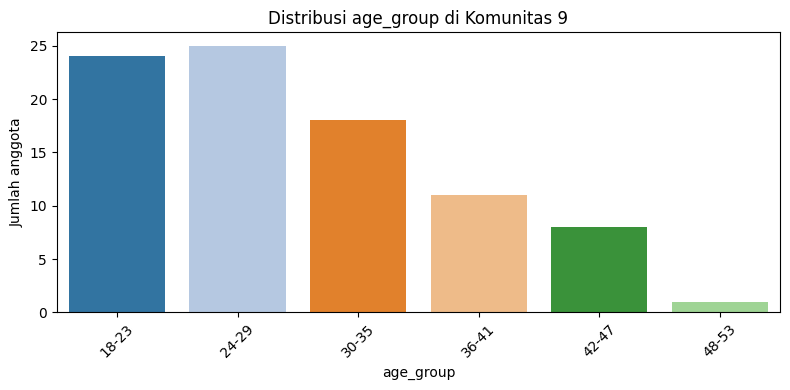

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['education', 'job', 'religion', 'orientation', 'drinks',
            'state', 'status', 'diet', 'offspring', 'smokes', 'drugs', 'age_group']

communities = df_sample['community'].unique()

for col in cat_cols:
    for comm in communities:
        plt.figure(figsize=(8,4))
        # Filter data komunitas tertentu
        data = df_sample[df_sample['community'] == comm]
        # Hitung frekuensi tiap kategori di kolom col
        distrib = data[col].value_counts().sort_index()

        sns.barplot(x=distrib.index.astype(str), y=distrib.values, palette='tab20')
        plt.title(f'Distribusi {col} di Komunitas {comm}')
        plt.xlabel(col)
        plt.ylabel('Jumlah anggota')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
from collections import defaultdict

top_k = 3
result = defaultdict(dict)  # {community: {column: [(category, count), ...]}}

for comm in df_sample['community'].unique():
    data_comm = df_sample[df_sample['community'] == comm]
    for col in cat_cols:
        counts = data_comm[col].value_counts()

        # Ambil top-k dengan mempertimbangkan nilai yang sama di posisi terakhir
        if len(counts) <= top_k:
            top_items = counts
        else:
            cutoff = counts.iloc[top_k - 1]
            top_items = counts[counts >= cutoff]

        result[comm][col] = list(top_items.items())


## Top 3 Setiap Fitur di setiap Komunitas

In [ ]:
from collections import defaultdict

top_k = 3
result = defaultdict(dict)

# Ambil 3 kategori terbanyak tiap kolom per komunitas
for comm in sorted(df_sample['community'].unique()):
    data_comm = df_sample[df_sample['community'] == comm]
    for col in cat_cols:
        counts = data_comm[col].value_counts()
        if len(counts) <= top_k:
            top_items = counts
        else:
            cutoff = counts.iloc[top_k - 1]
            top_items = counts[counts >= cutoff]
        result[comm][col] = list(top_items.items())

# Cetak hasilnya
for comm in sorted(result.keys()):
    print(f"\n### Komunitas {comm} ###")
    for col in cat_cols:
        top_values = result[comm][col]
        top_str = ', '.join([f"{val} ({cnt})" for val, cnt in top_values])
        print(f"{col}: {top_str}")



### Komunitas 0 ###
education: graduated from college/university (75), working on college/university (32), graduated from masters program (22)
job: other (35), student (23), sales / marketing / biz dev (22), artistic / musical / writer (22)
religion: atheism (53), agnosticism (43), other (39)
orientation: straight (191), gay (4)
drinks: socially (126), often (36), rarely (11), very often (11)
state: california (195)
status: single (192), seeing someone (2), married (1)
diet: mostly anything (97), strictly anything (33), anything (25)
offspring: doesn't have kids (69), doesn't have kids, but might want them (44), doesn't want kids (29)
smokes: no (72), when drinking (47), yes (37)
drugs: sometimes (138), never (47), often (10)
age_group: 24-29 (90), 18-23 (42), 30-35 (37)

### Komunitas 1 ###
education: graduated from college/university (45), graduated from masters program (22), graduated from space camp (4)
job: sales / marketing / biz dev (11), other (10), computer / hardware / softw